In [418]:
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [419]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [420]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [421]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [422]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [423]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [424]:
df.drop("country", axis=1, inplace=True)

In [425]:
df.drop("country_long", axis=1, inplace=True)

In [426]:
df.drop("other_fuel2", axis=1, inplace=True)

In [427]:
df.drop("other_fuel3", axis=1, inplace=True)

In [428]:
df.drop("wepp_id", axis=1, inplace=True)

In [429]:
df.drop("year_of_capacity_data", axis=1, inplace=True)

In [430]:
df.drop("generation_gwh_2013", axis=1, inplace=True)

In [431]:
df.drop("generation_gwh_2019", axis=1, inplace=True)

In [432]:
df.drop(["estimated_generation_gwh"], axis=1, inplace=True)

In [433]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [434]:
df.drop("name", axis=1, inplace=True)

In [435]:
df.nunique()

gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

In [436]:
df['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [437]:
df.drop('generation_data_source', axis=1, inplace=True)

In [438]:
df.drop('owner', axis=1, inplace=True)

In [439]:
df.isnull().sum()

gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
url                      0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

<Axes: >

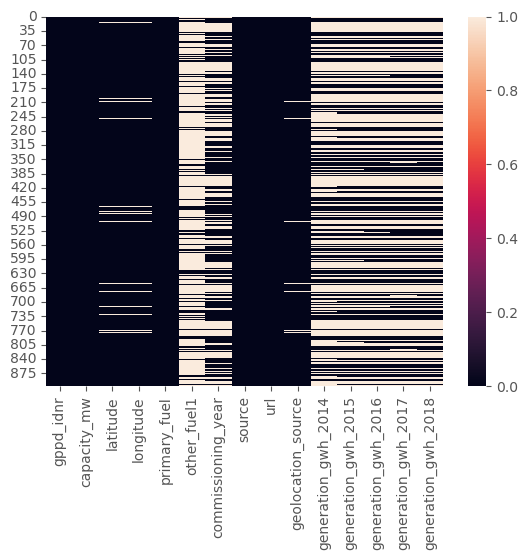

In [440]:
sns.heatmap(df.isnull())

In [441]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

In [442]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

In [443]:
from sklearn.impute import KNNImputer
knnimp=KNNImputer(n_neighbors=3)
knn_imp=pd.DataFrame(knnimp.fit_transform(df[['capacity_mw','generation_gwh_2014']]))
knn_imp.columns=['capacity_mw','generation_gwh_2014']
knn_imp

,capacity_mw,generation_gwh_2014
0,2.5,16.779017
1,98.0,324.532517
2,39.2,85.185267
3,135.0,617.789264
4,1800.0,3035.550000
...,...,...
902,1600.0,3691.517167
903,3.0,16.779017
904,25.5,16.779017
905,80.0,213.394333


In [444]:
df['generation_gwh_2014']=knn_imp['generation_gwh_2014']
df['generation_gwh_2014']

0        16.779017
1       324.532517
2        85.185267
3       617.789264
4      3035.550000
          ...     
902    3691.517167
903      16.779017
904      16.779017
905     213.394333
906      16.779017
Name: generation_gwh_2014, Length: 907, dtype: float64

In [445]:
knn_imp=pd.DataFrame(knnimp.fit_transform(df[['capacity_mw','generation_gwh_2015']]))
knn_imp.columns=['capacity_mw','generation_gwh_2015']
df['generation_gwh_2015']=knn_imp['generation_gwh_2015']



In [446]:
knn_imp=pd.DataFrame(knnimp.fit_transform(df[['capacity_mw','generation_gwh_2015']]))
knn_imp.columns=['capacity_mw','generation_gwh_2015']
df['generation_gwh_2015']=knn_imp['generation_gwh_2015']

In [447]:
knn_imp=pd.DataFrame(knnimp.fit_transform(df[['capacity_mw','generation_gwh_2016']]))
knn_imp.columns=['capacity_mw','generation_gwh_2016']
df['generation_gwh_2016']=knn_imp['generation_gwh_2016']


In [448]:
knn_imp=pd.DataFrame(knnimp.fit_transform(df[['capacity_mw','generation_gwh_2017']]))
knn_imp.columns=['capacity_mw','generation_gwh_2017']
df['generation_gwh_2017']=knn_imp['generation_gwh_2017']

In [449]:
knn_imp=pd.DataFrame(knnimp.fit_transform(df[['capacity_mw','generation_gwh_2018']]))
knn_imp.columns=['capacity_mw','generation_gwh_2018']
df['generation_gwh_2018']=knn_imp['generation_gwh_2018']

In [450]:
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950
1,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,324.532517,168.964267,253.214233,210.319783,299.083733
2,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,85.185267,112.481433,114.819683,185.902483,198.180783
3,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,3691.517167,0.994875,233.596650,865.400000,686.500000
903,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,16.779017,13.293200,8.974900,22.244883,47.968950
904,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,16.779017,13.293200,8.974900,22.244883,47.968950
905,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,213.394333,187.315383,216.123950,243.171367,256.620450


In [451]:
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [452]:
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [453]:
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())

In [454]:
df.isnull().sum()

gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
url                    0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<Axes: >

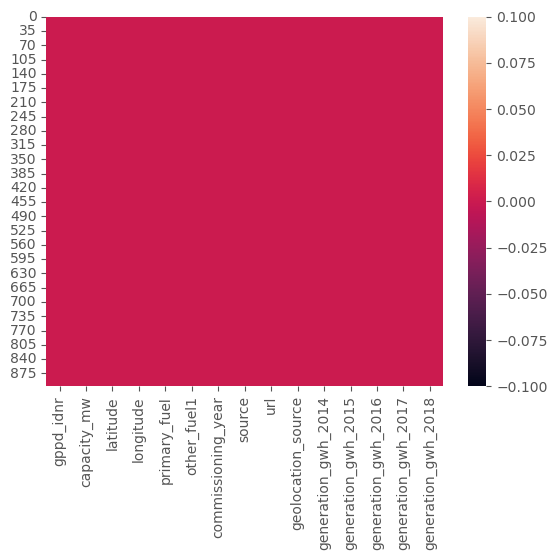

In [455]:
sns.heatmap(df.isnull())

In [456]:
df["Age_of_Powerplant"]=2019-(df['commissioning_year'])
df.drop('commissioning_year',axis=1, inplace=True)
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age_of_Powerplant
0,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950,8.0
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,324.532517,168.964267,253.214233,210.319783,299.083733,18.0
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,85.185267,112.481433,114.819683,185.902483,198.180783,18.0
3,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI,3691.517167,0.994875,233.596650,865.400000,686.500000,3.0
903,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
904,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
905,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,213.394333,187.315383,216.123950,243.171367,256.620450,18.0


In [457]:
df.drop('url',axis=1,inplace=True)
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age_of_Powerplant
0,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950,8.0
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,324.532517,168.964267,253.214233,210.319783,299.083733,18.0
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,85.185267,112.481433,114.819683,185.902483,198.180783,18.0
3,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,3691.517167,0.994875,233.596650,865.400000,686.500000,3.0
903,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
904,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
905,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,213.394333,187.315383,216.123950,243.171367,256.620450,18.0


In [458]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age_of_Powerplant
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1216.741950,1225.073916,1247.908108,1294.299953,1348.291762,20.271224
std,590.085456,6.079148,4.815073,2944.274717,3119.361453,3138.569942,3187.953881,3293.148855,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.725000,17.072000,74.388900,16.779017,13.293200,8.974900,22.244883,47.968950,16.000000
50%,59.200000,21.281800,76.719500,171.853083,139.546801,131.021600,128.822650,133.912800,18.000000
75%,385.250000,25.176450,79.206100,926.055500,735.113025,780.149650,817.977250,810.733240,21.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,92.000000


In [459]:
df.dtypes

gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
Age_of_Powerplant      float64
dtype: object

In [460]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)
    

['gppd_idnr', 'primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [461]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Age_of_Powerplant']


Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


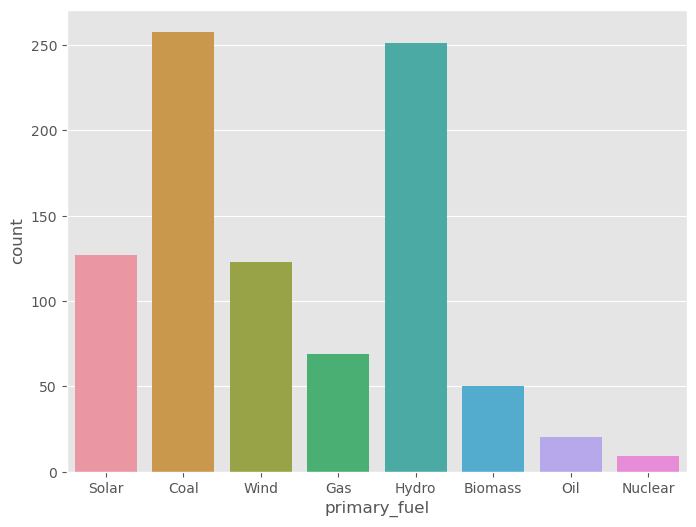

In [462]:
print(df['primary_fuel'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='primary_fuel',data=df)
plt.show()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


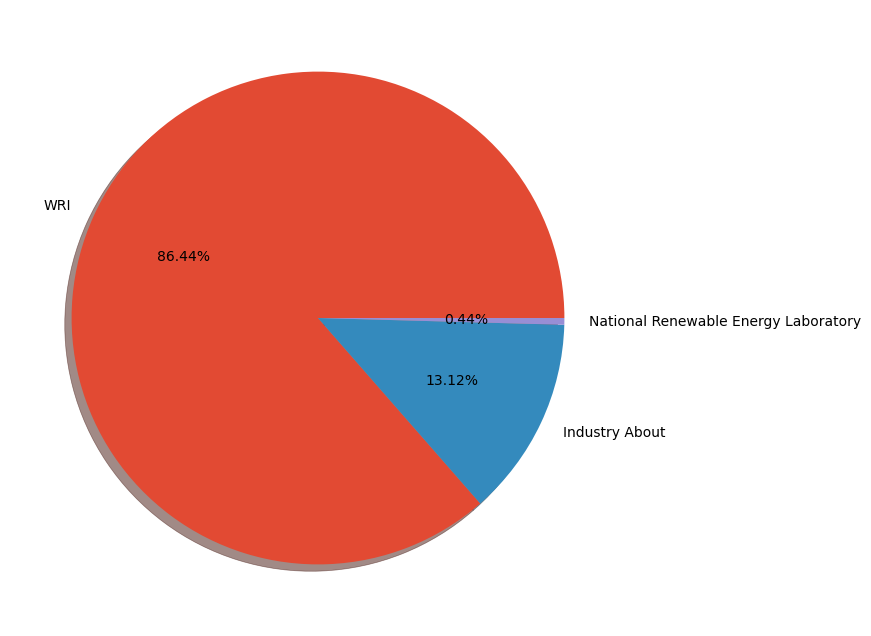

In [463]:
print(df['geolocation_source'].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax=plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()


Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

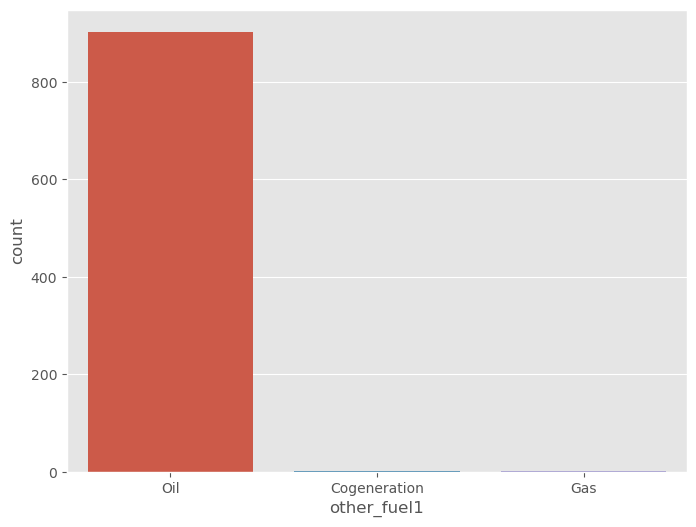

In [464]:
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='other_fuel1',data=df)
plt.show

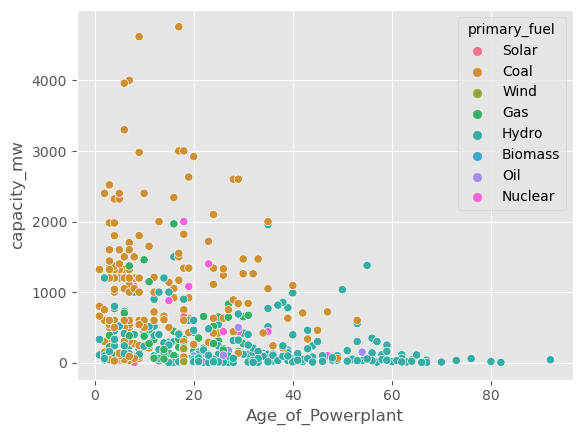

In [465]:
plt.style.use('ggplot')
sns.scatterplot(x='Age_of_Powerplant',y='capacity_mw',hue='primary_fuel',data=df)
plt.show()

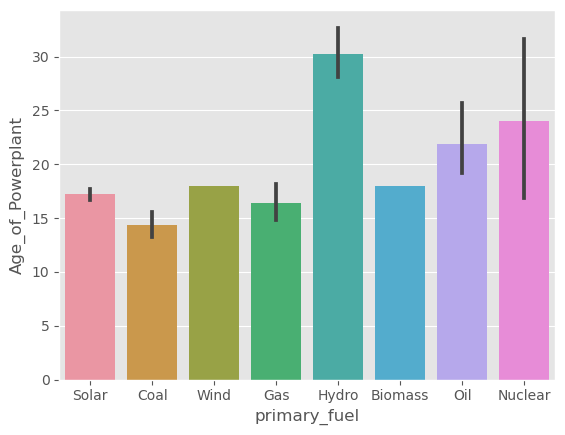

In [466]:
sns.barplot(x='primary_fuel',y='Age_of_Powerplant',data=df)
plt.show()

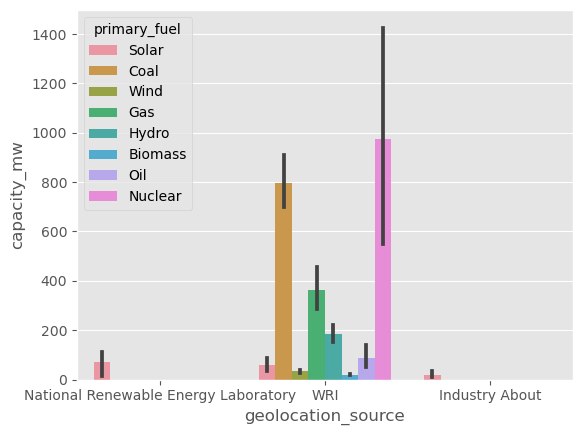

In [467]:
sns.barplot(x='geolocation_source',y='capacity_mw',data=df,hue='primary_fuel')
plt.show()

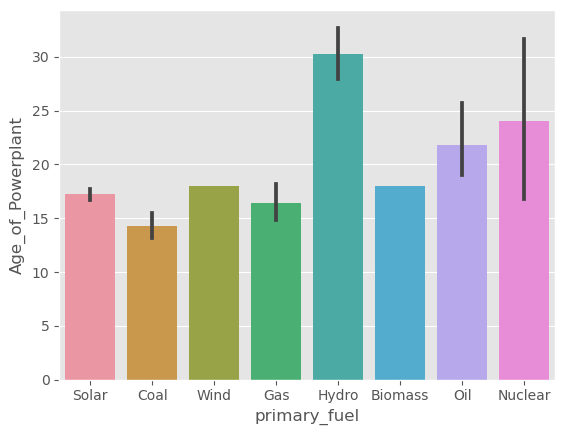

In [468]:
sns.barplot(x='primary_fuel',y='Age_of_Powerplant',data=df)
plt.show()

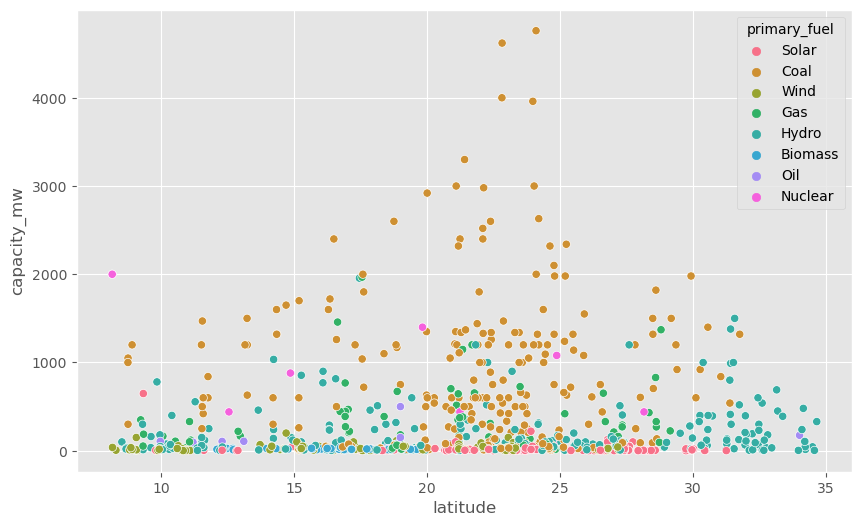

In [469]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
sns.scatterplot(x='latitude',y='capacity_mw',hue='primary_fuel',data=df)
plt.show()

<Axes: xlabel='longitude', ylabel='capacity_mw'>

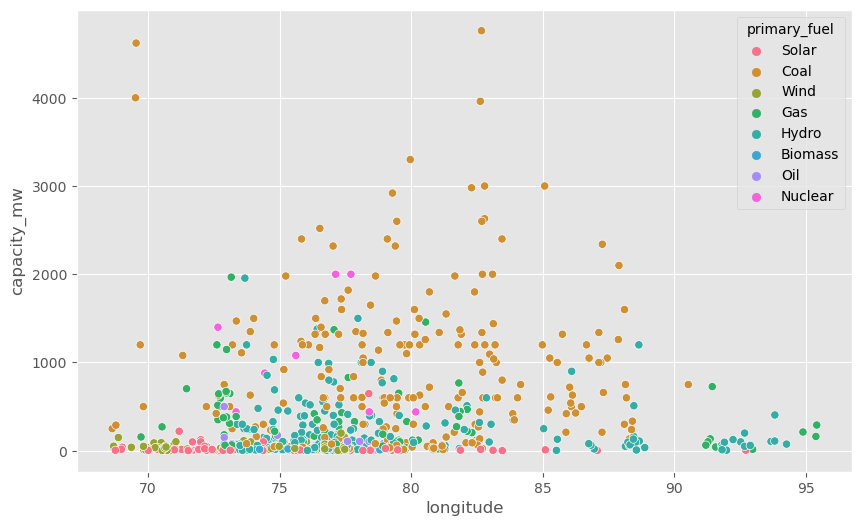

In [470]:
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
sns.scatterplot(x='longitude',y='capacity_mw',hue='primary_fuel',data=df)

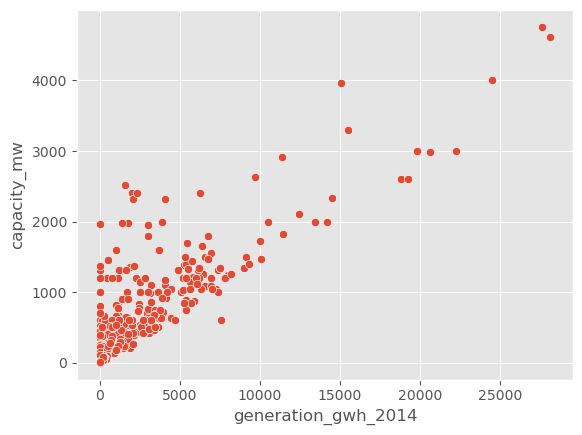

In [471]:
sns.scatterplot(x="generation_gwh_2014",y='capacity_mw',data=df)
plt.show()

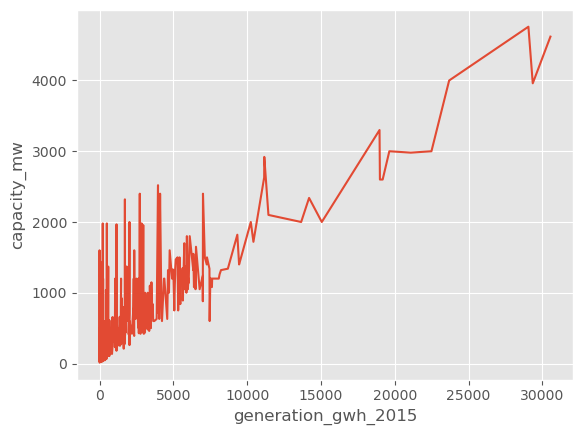

In [472]:

sns.lineplot(x=df['generation_gwh_2015'],y=df['capacity_mw'],data=df)
plt.show()

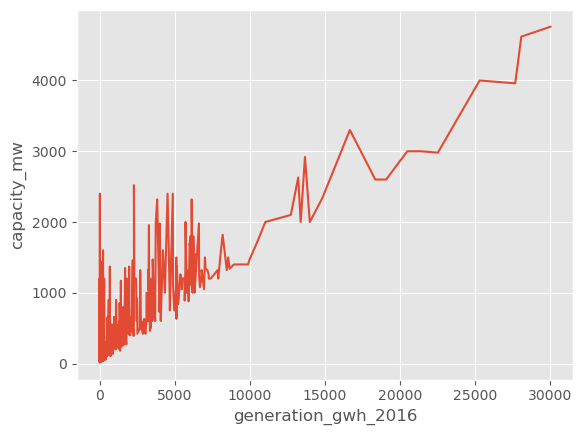

In [473]:
sns.lineplot(x=df['generation_gwh_2016'],y=df['capacity_mw'],data=df)
plt.show()


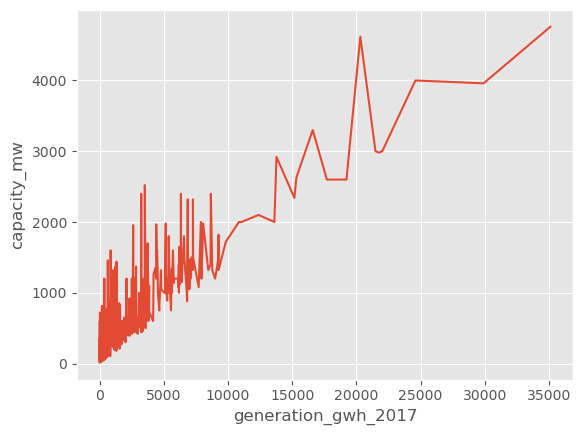

In [474]:
sns.lineplot(x=df['generation_gwh_2017'],y=df['capacity_mw'],data=df)
plt.show()

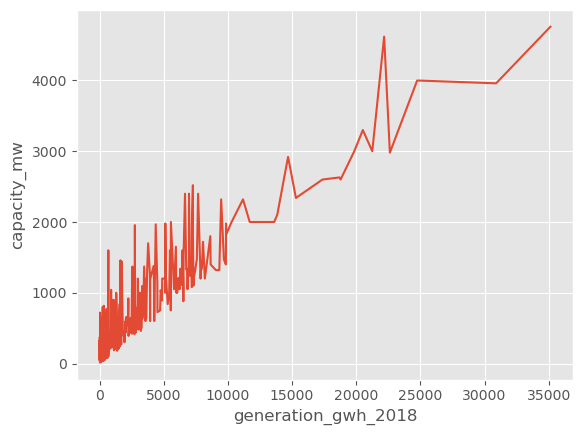

In [475]:
sns.lineplot(x=df['generation_gwh_2018'],y=df['capacity_mw'],data=df)
plt.show()

<Figure size 1000x700 with 0 Axes>

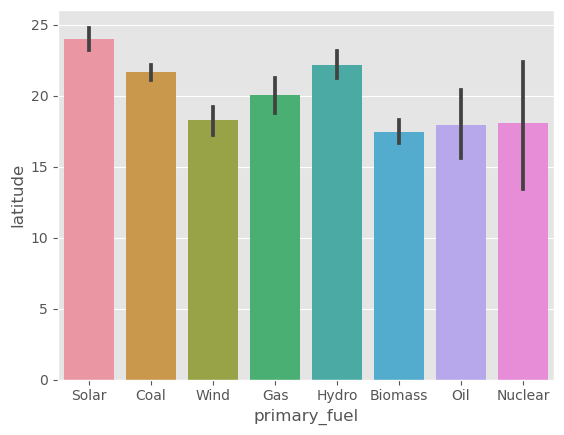

In [476]:
plt.figure(figsize=(10,7))
plt.figure('Comparison between Latitude and Fuel')
sns.barplot(x='primary_fuel',y='latitude',data=df)
plt.show()

<Axes: xlabel='primary_fuel', ylabel='longitude'>

<Figure size 1000x700 with 0 Axes>

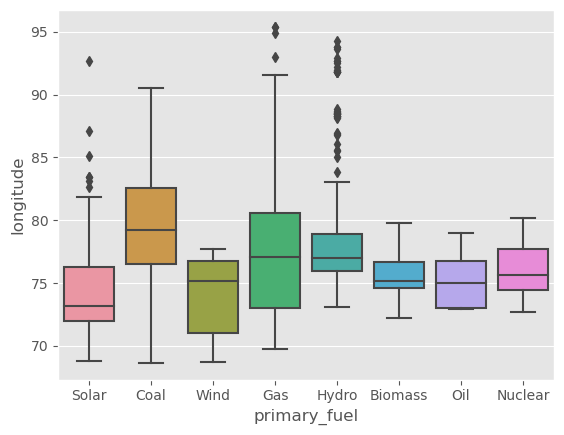

In [477]:
plt.figure(figsize=(10,7))
plt.figure('Comparison between Longitude and Fuel-type')
sns.boxplot(x='primary_fuel',y='longitude',data=df)

<Figure size 1000x700 with 0 Axes>

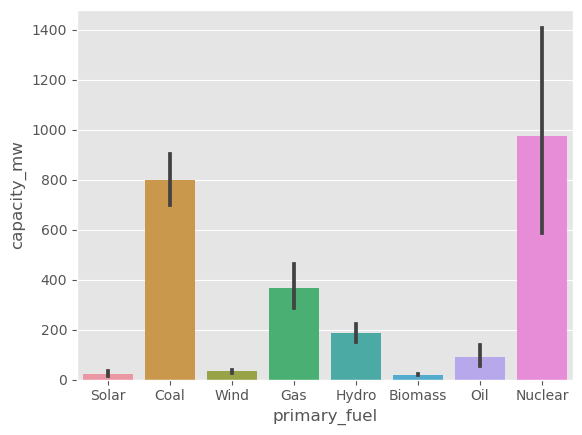

In [478]:
plt.figure(figsize=(10,7))
plt.figure('Comparison between Latitude and Fuel')
sns.barplot(x='primary_fuel',y='capacity_mw',data=df)
plt.show()

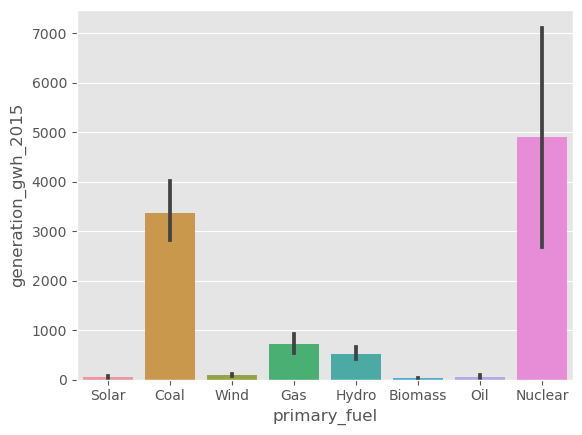

In [479]:

sns.barplot(x=df['primary_fuel'],y=df['generation_gwh_2015'],data=df)
plt.show()

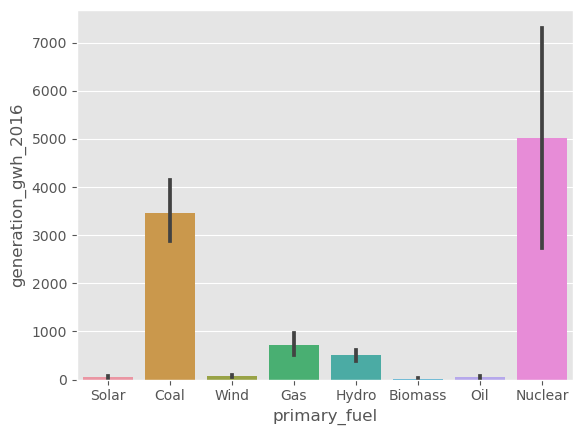

In [480]:
sns.barplot(x=df['primary_fuel'],y=df['generation_gwh_2016'],data=df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

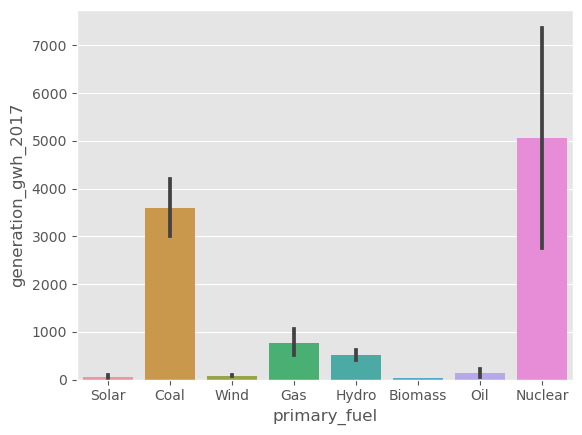

In [481]:
sns.barplot(x=df['primary_fuel'],y=df['generation_gwh_2017'],data=df)
plt.show

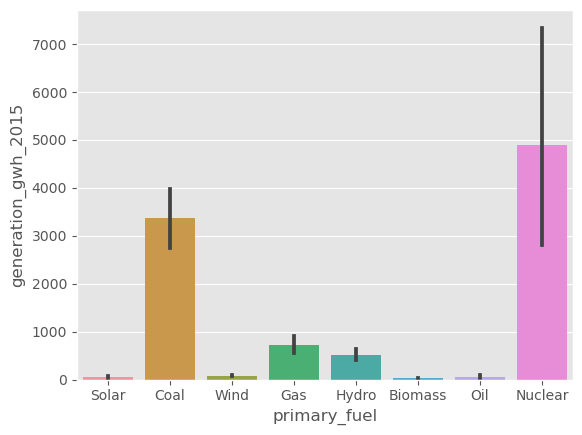

In [482]:
sns.barplot(x=df['primary_fuel'],y=df['generation_gwh_2015'],data=df)
plt.show()

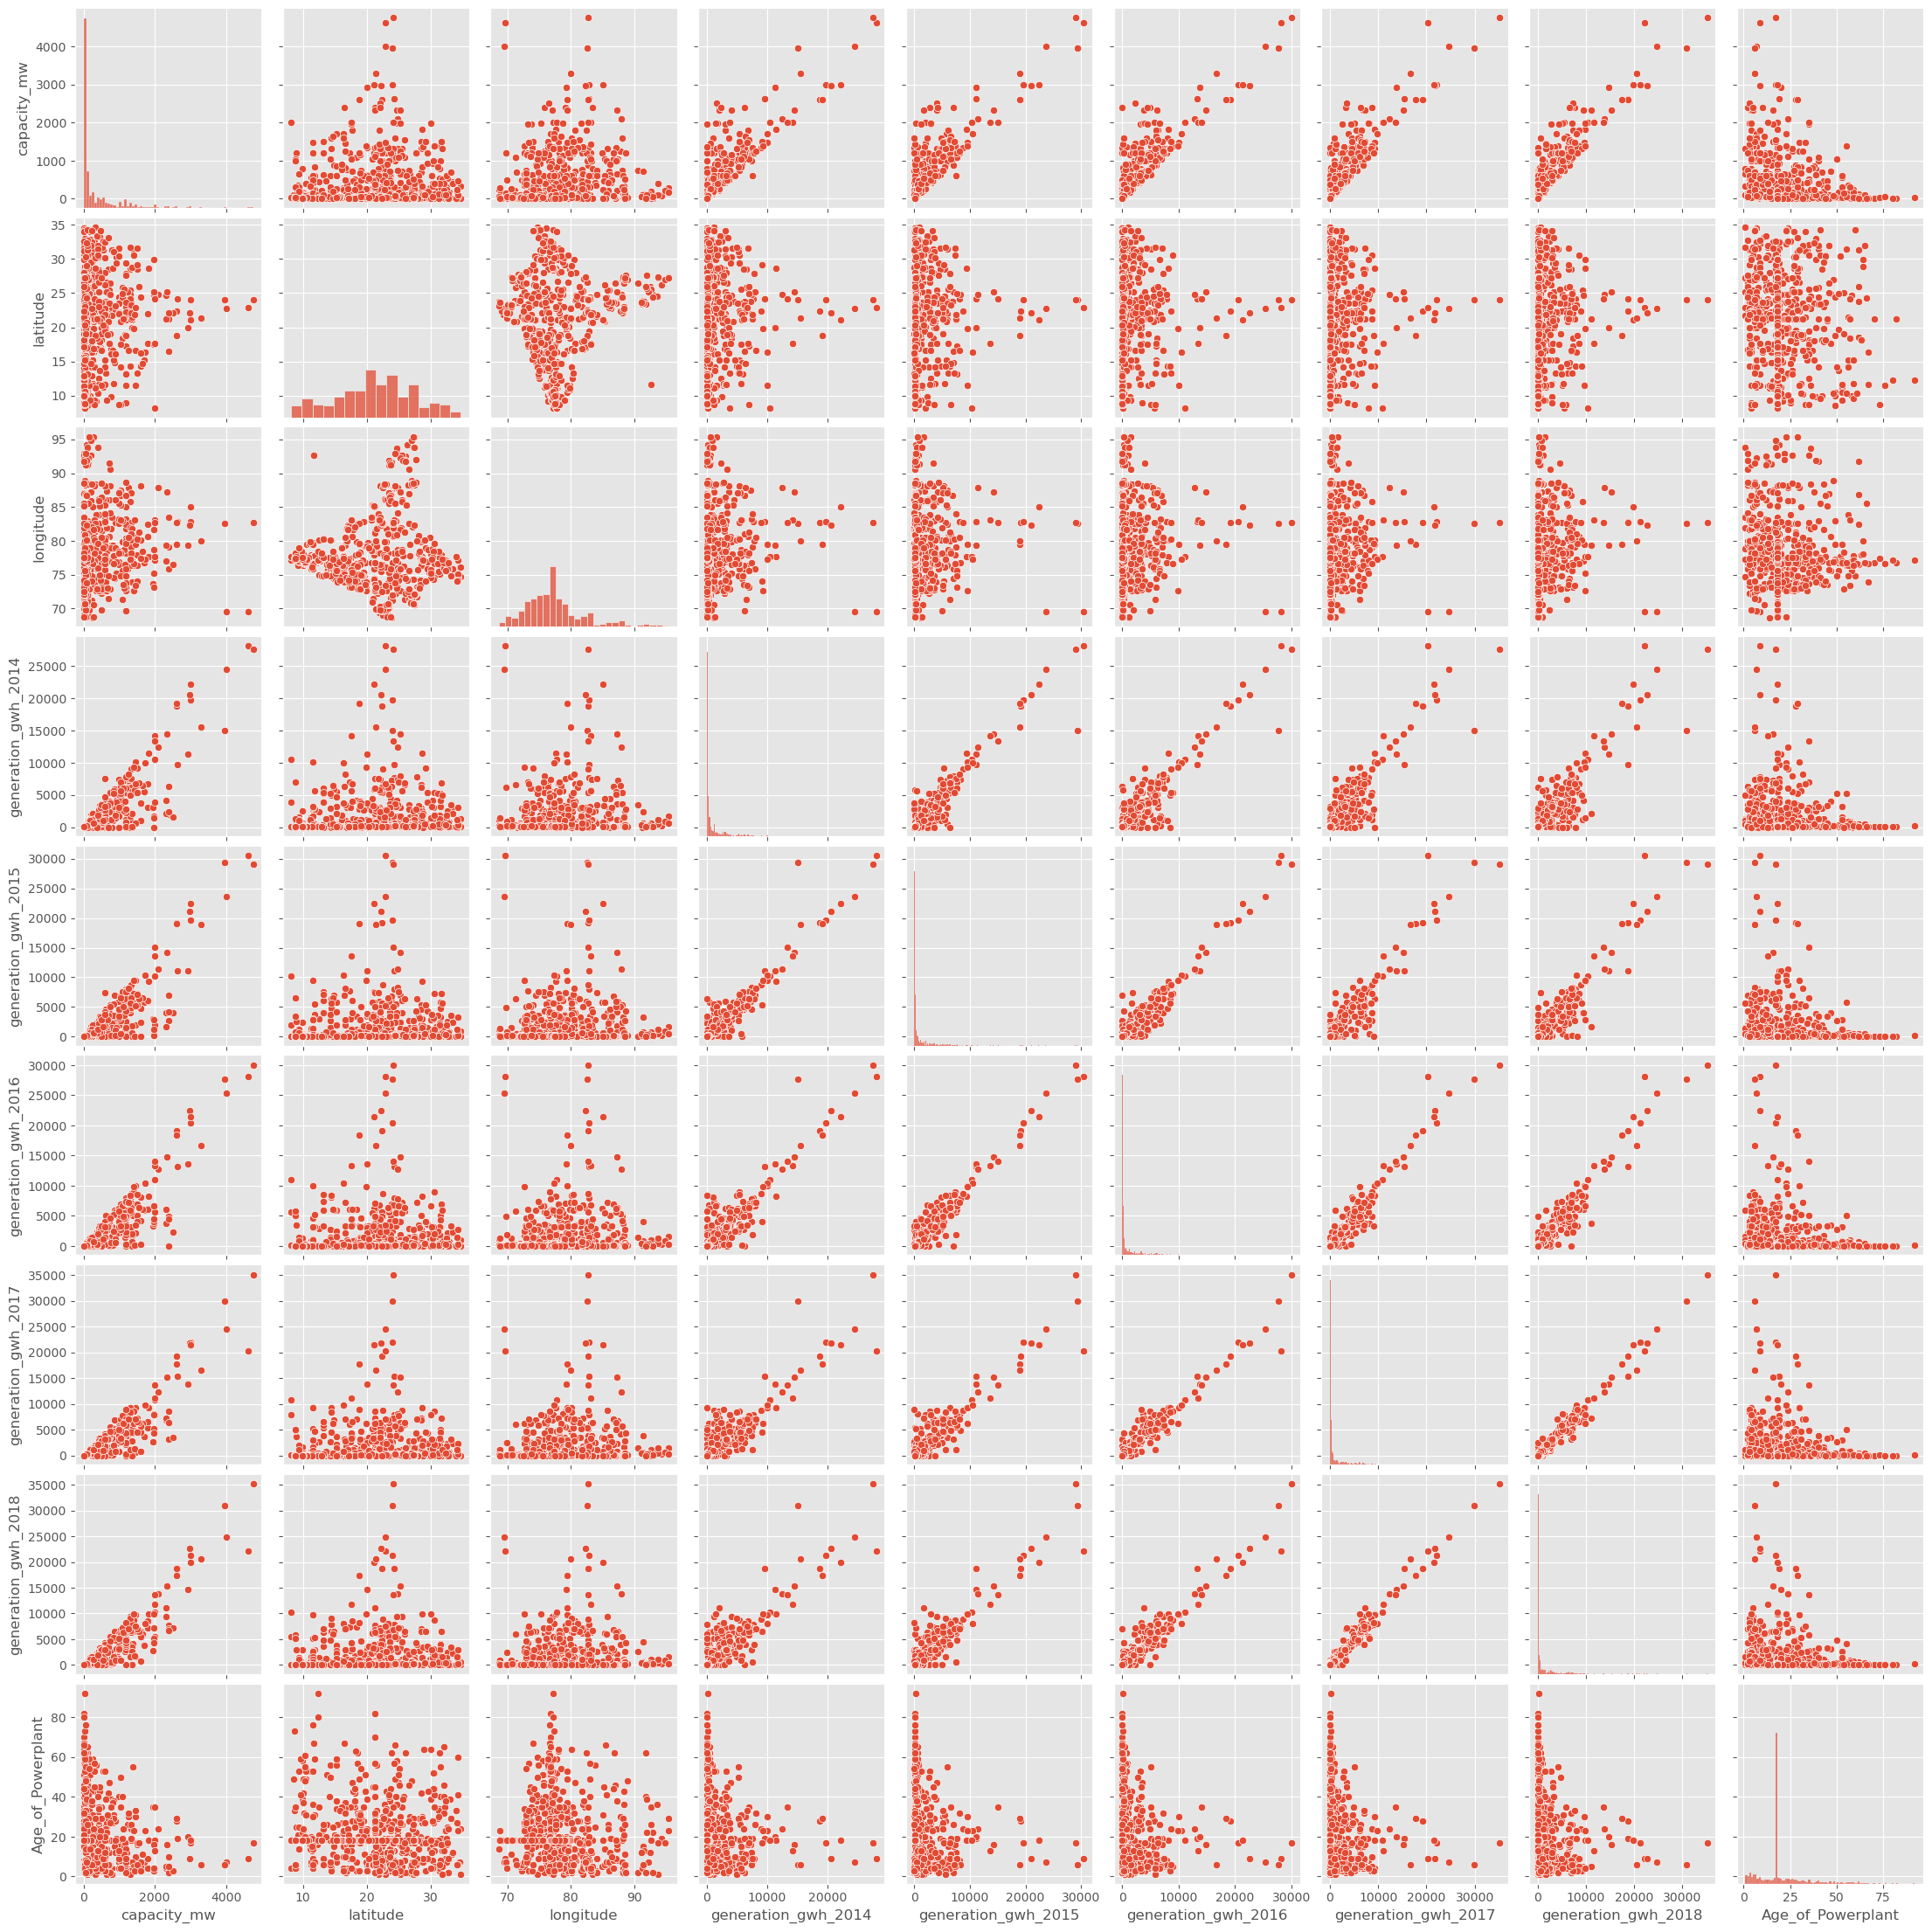

In [483]:
sns.pairplot(df)

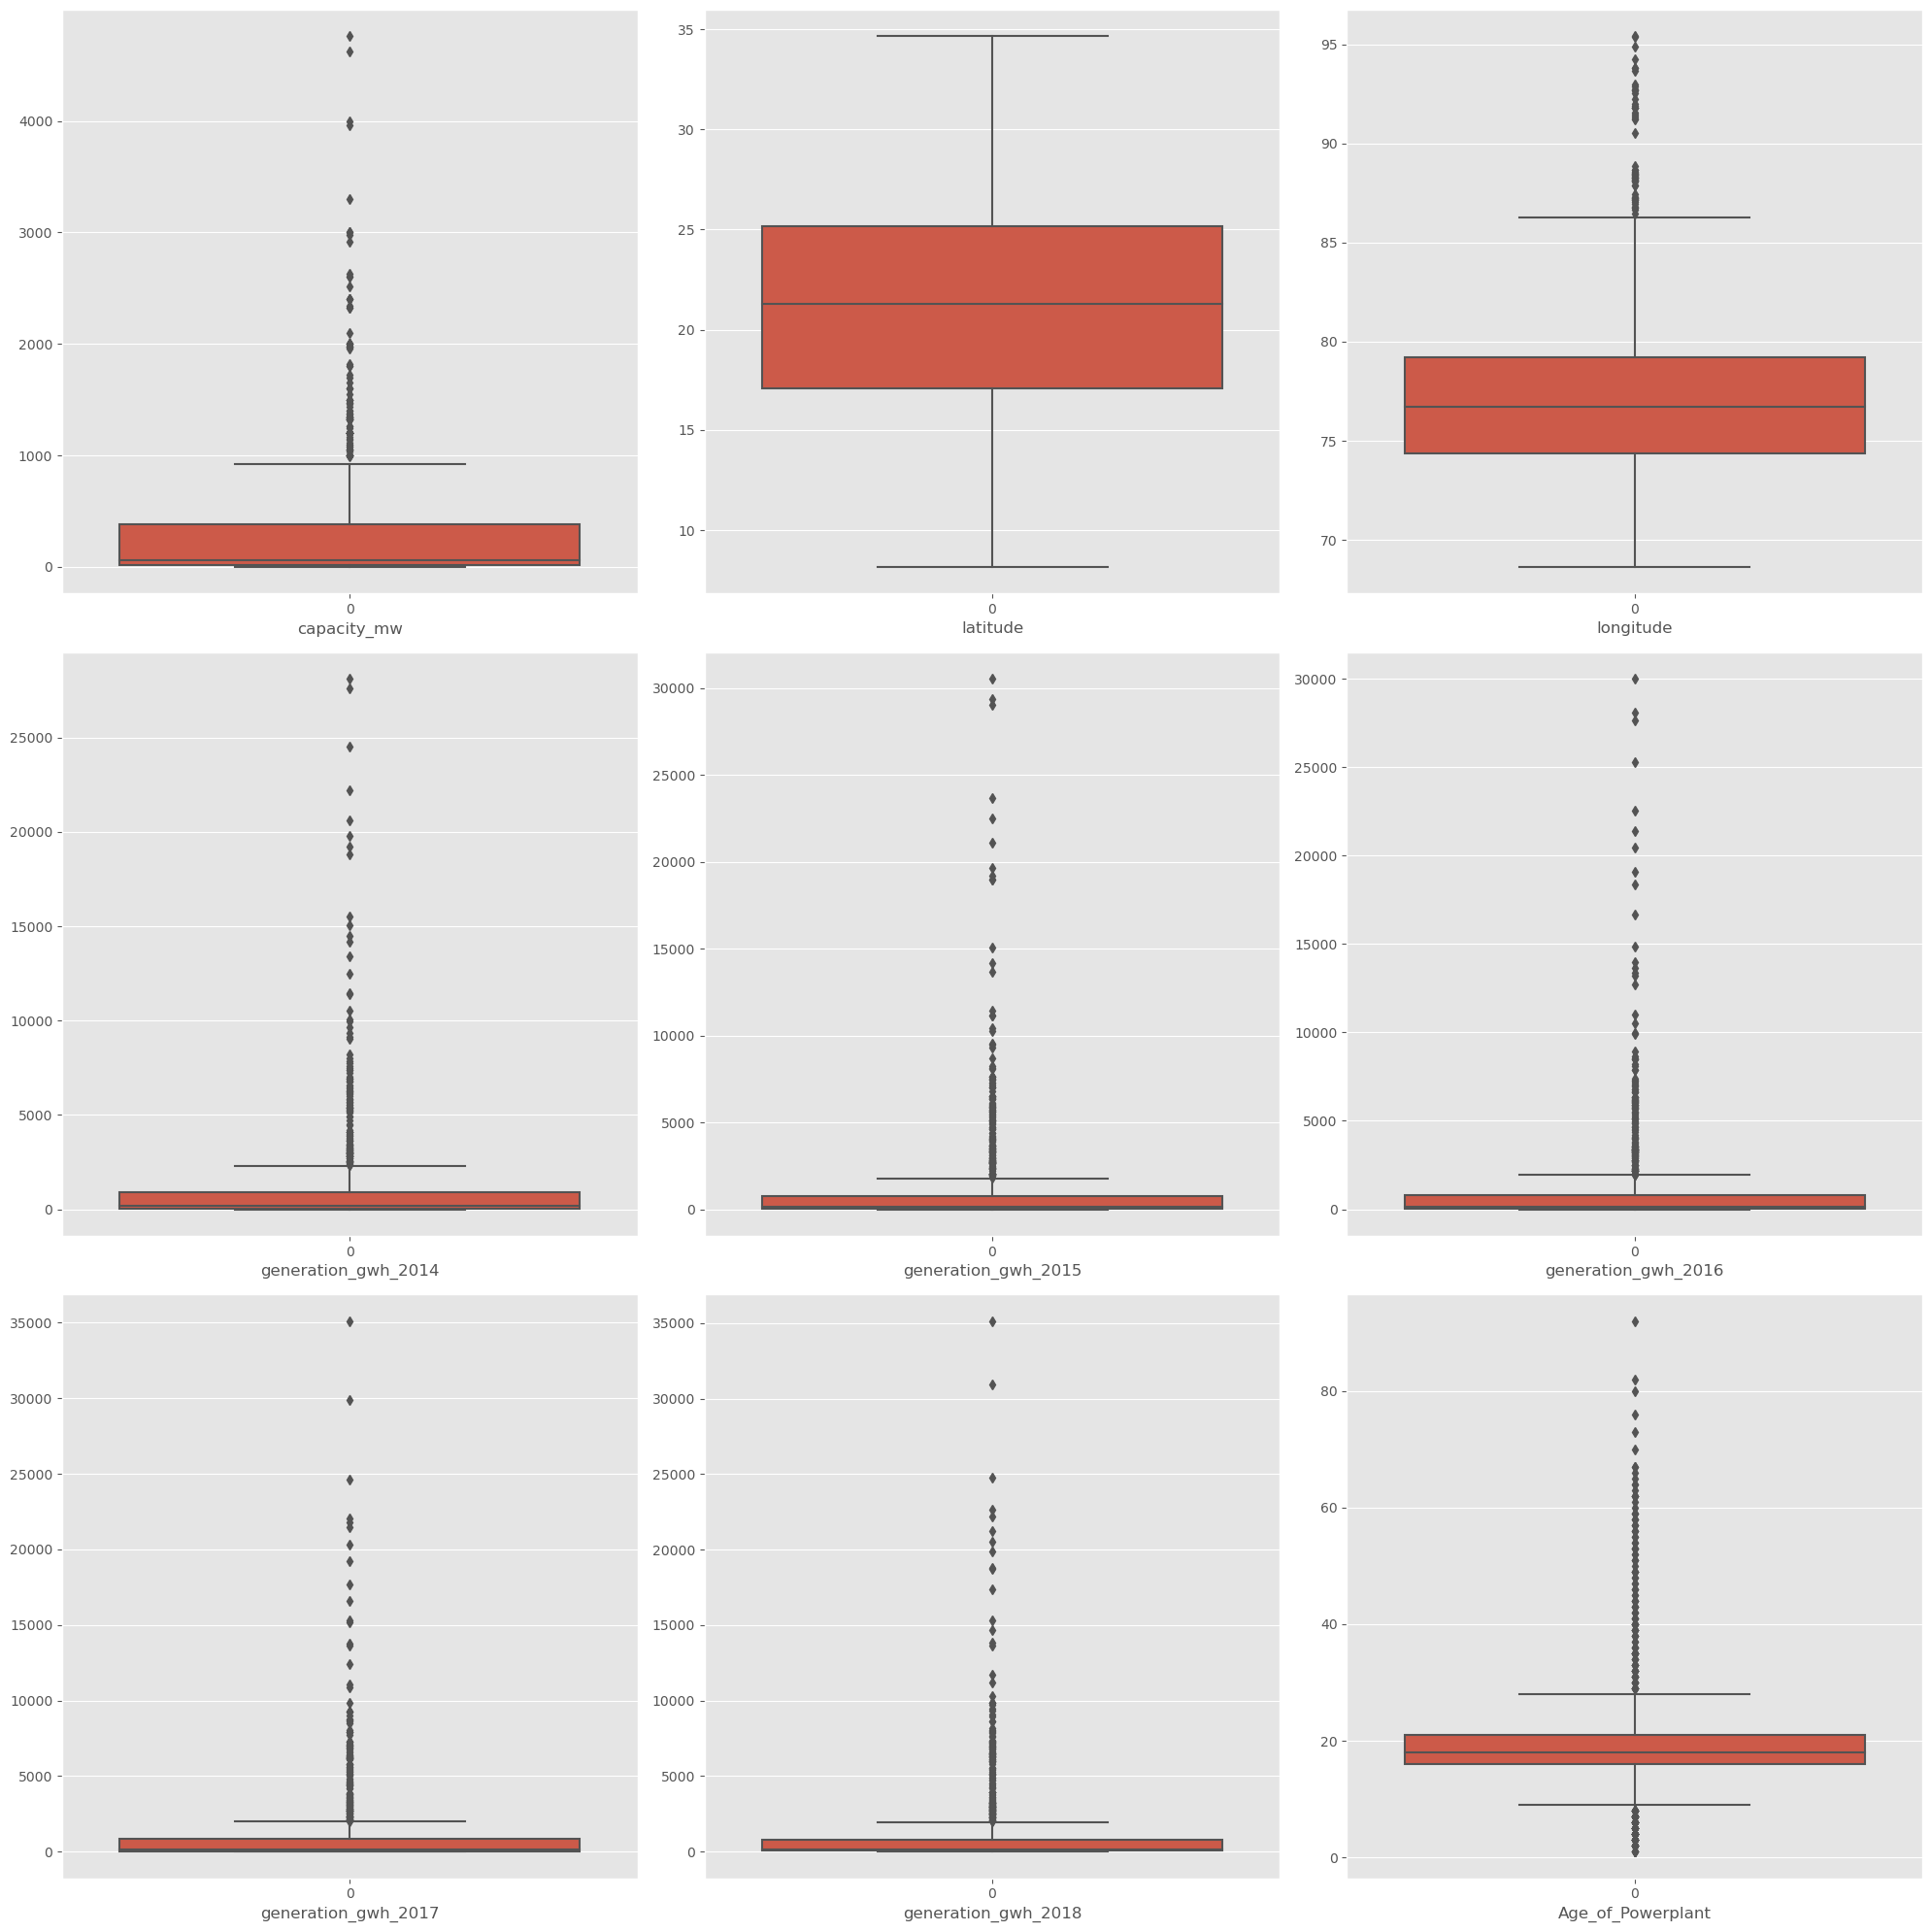

In [484]:
plt.figure(figsize=(20,20))
ptnum=1
for column in numerical_col:
    if ptnum<=9:
        ax=plt.subplot(3,3,ptnum)
        sns.boxplot(df[column])
        plt.xlabel(column)
    ptnum+=1
plt.tight_layout()

In [485]:
from scipy.stats import zscore

features=df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Age_of_Powerplant']]

z=np.abs(zscore(features))
z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age_of_Powerplant
0,0.869917,0.407783,0.388685,0.394962,0.399239,0.395075,0.933076
1,0.585590,0.303199,0.338753,0.317101,0.340211,0.318779,0.172699
2,1.673567,0.384536,0.356870,0.361220,0.347875,0.349436,0.172699
3,2.895239,0.203542,0.122313,0.115372,0.197893,0.219380,0.400812
4,1.035238,0.618085,1.504758,1.592397,1.284064,1.801917,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.841002,0.392630,0.323355,0.134612,0.201071,1.313265
903,0.153415,0.407783,0.388685,0.394962,0.399239,0.395075,0.172699
904,0.383592,0.407783,0.388685,0.394962,0.399239,0.395075,0.172699
905,0.764564,0.340967,0.332867,0.328925,0.329901,0.331681,0.172699


In [486]:
new_df=df[(z<3).all(axis=1)]
new_df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age_of_Powerplant
0,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950,8.0
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,324.532517,168.964267,253.214233,210.319783,299.083733,18.0
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,85.185267,112.481433,114.819683,185.902483,198.180783,18.0
3,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,3691.517167,0.994875,233.596650,865.400000,686.500000,3.0
903,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
904,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
905,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,213.394333,187.315383,216.123950,243.171367,256.620450,18.0


In [487]:
df.shape

(907, 14)

In [488]:
(907-852)/907*100

6.063947078280044

In [489]:
Q1=features.quantile(0.25)

Q3=features.quantile(0.75)

IQR=Q3-Q1

new_df1=new_df[~((new_df < (Q1-1.5*IQR)) | (new_df >(Q3 + 1.5*IQR))).any(axis=1)]
new_df1

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age_of_Powerplant
1,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,324.532517,168.964267,253.214233,210.319783,299.083733,18.0
2,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,85.185267,112.481433,114.819683,185.902483,198.180783,18.0
5,IND0000003,250.0,23.7689,68.6447,Coal,Oil,Central Electricity Authority,WRI,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,14.0
7,IND0000005,192.0,32.2258,77.2070,Hydro,Oil,Central Electricity Authority,WRI,674.391100,721.335200,675.724400,679.594950,579.318850,9.0
8,IND0000006,290.0,16.3300,75.8863,Hydro,Oil,Central Electricity Authority,WRI,480.594950,144.434200,402.029750,439.372100,406.377900,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,IND0000512,106.6,13.1156,77.5838,Oil,Oil,Central Electricity Authority,WRI,0.000000,0.000000,0.000000,356.782283,0.000000,26.0
903,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
904,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,16.779017,13.293200,8.974900,22.244883,47.968950,18.0
905,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,213.394333,187.315383,216.123950,243.171367,256.620450,18.0


In [490]:
(907-508)/907*100

43.991179713340685

In [491]:
categorical_col=['primary_fuel','other_fuel1','source','geolocation_source']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,108,1
1,1,2,173,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,76,0
904,7,2,21,2
905,1,2,59,2


In [492]:
new_df.skew()


capacity_mw             2.178028
latitude               -0.114376
longitude               0.944500
primary_fuel            0.418465
other_fuel1           -19.820871
source                  1.744999
geolocation_source     -2.068499
generation_gwh_2014     2.562088
generation_gwh_2015     2.519395
generation_gwh_2016     2.504234
generation_gwh_2017     2.430029
generation_gwh_2018     2.502936
Age_of_Powerplant       1.278164
dtype: float64

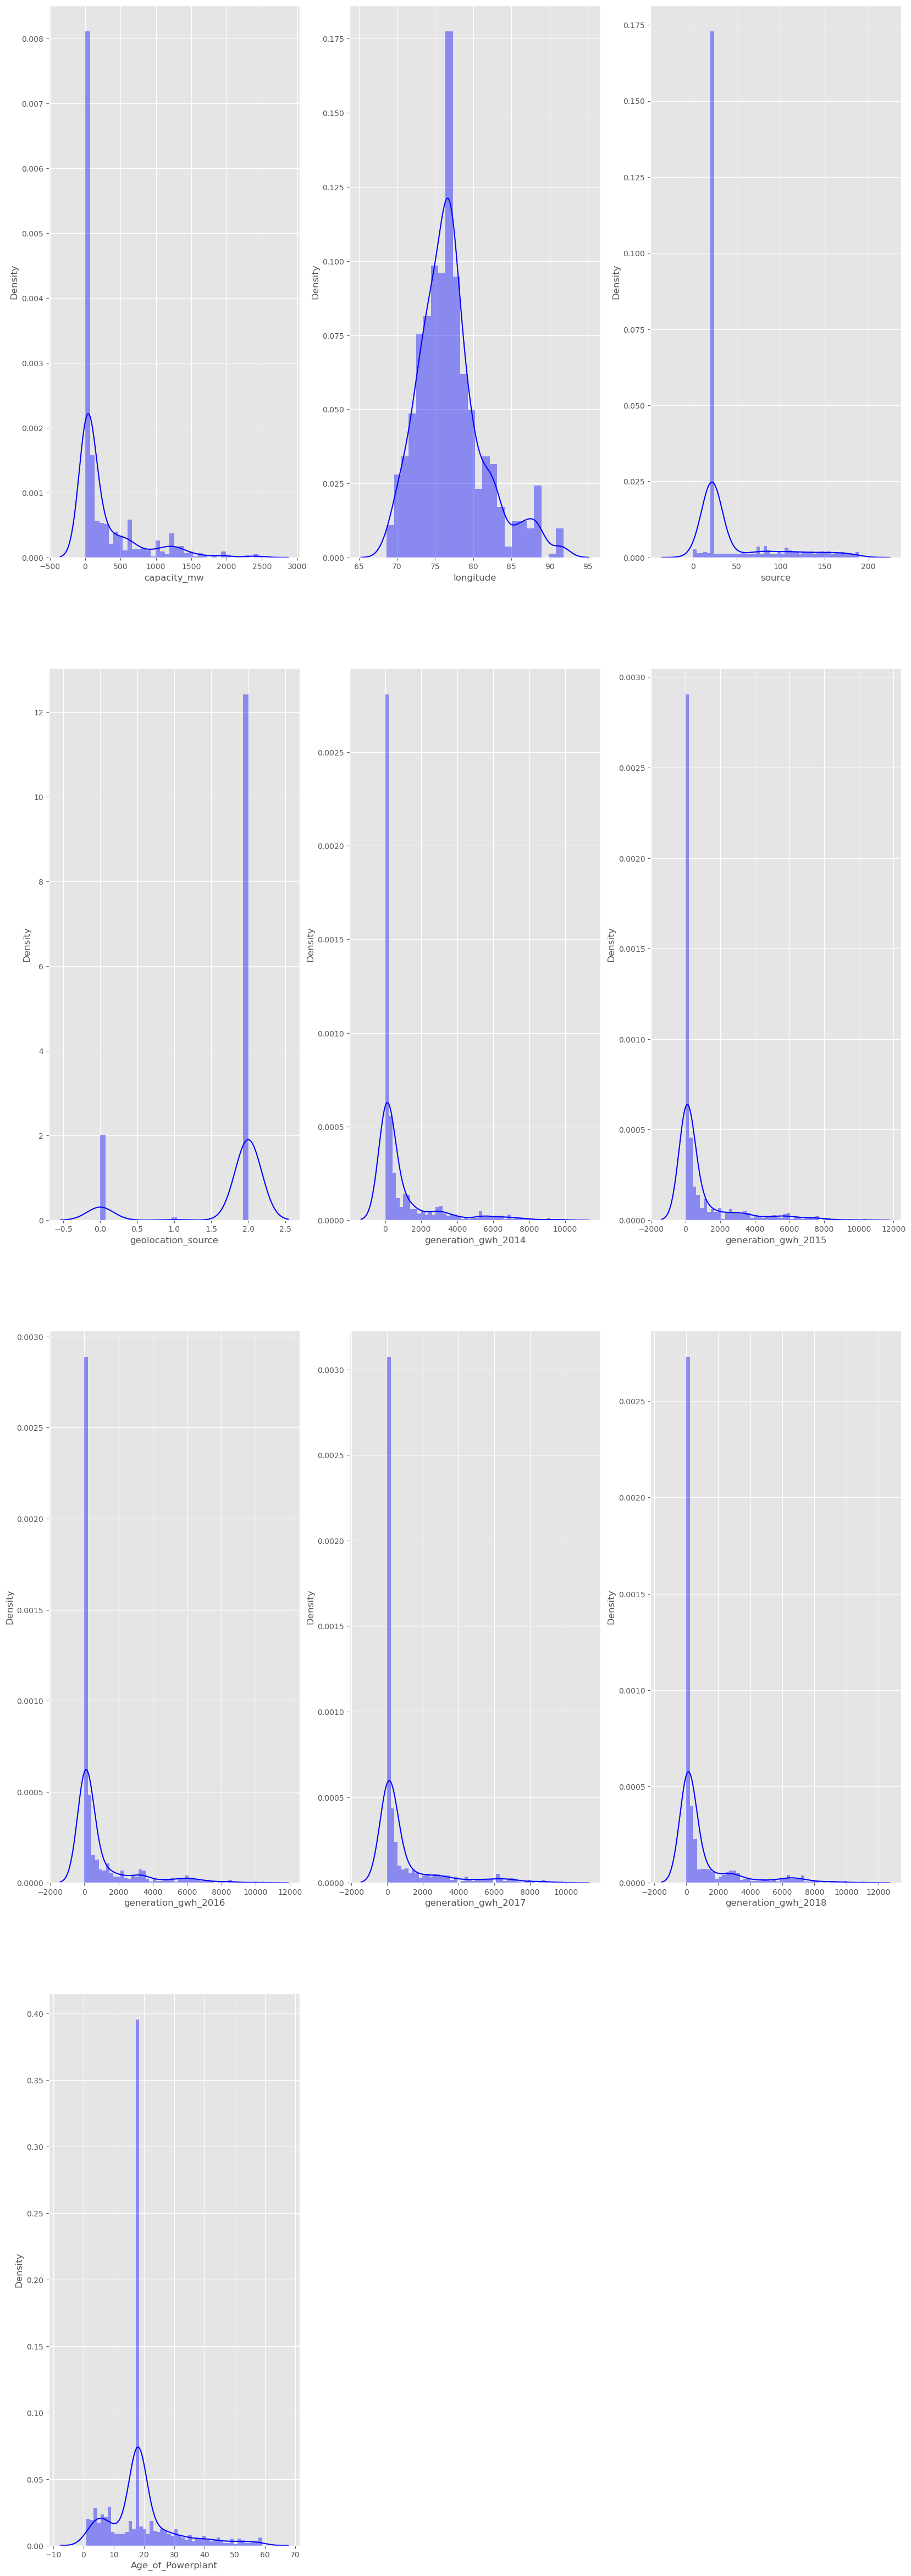

In [493]:
feat=new_df[['capacity_mw','longitude','source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Age_of_Powerplant']]
plt.figure(figsize=(20,60))
ptnum=1
for columns in feat:
    if ptnum<=10:
        ax=plt.subplot(4,3,ptnum)
        sns.distplot(feat[columns],color='b')
        plt.xlabel(columns)
    ptnum+=1
plt.show()

In [494]:
sk_features=['capacity_mw','longitude','source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Age_of_Powerplant']
from sklearn.preprocessing import PowerTransformer
scalar=PowerTransformer(method='yeo-johnson')
new_df[sk_features]=scalar.fit_transform(new_df[sk_features].values)
new_df[sk_features].head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age_of_Powerplant
0,-1.677481,-0.923030,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,-0.500876,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,-2.378126,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,2.432203,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,1.261806,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572


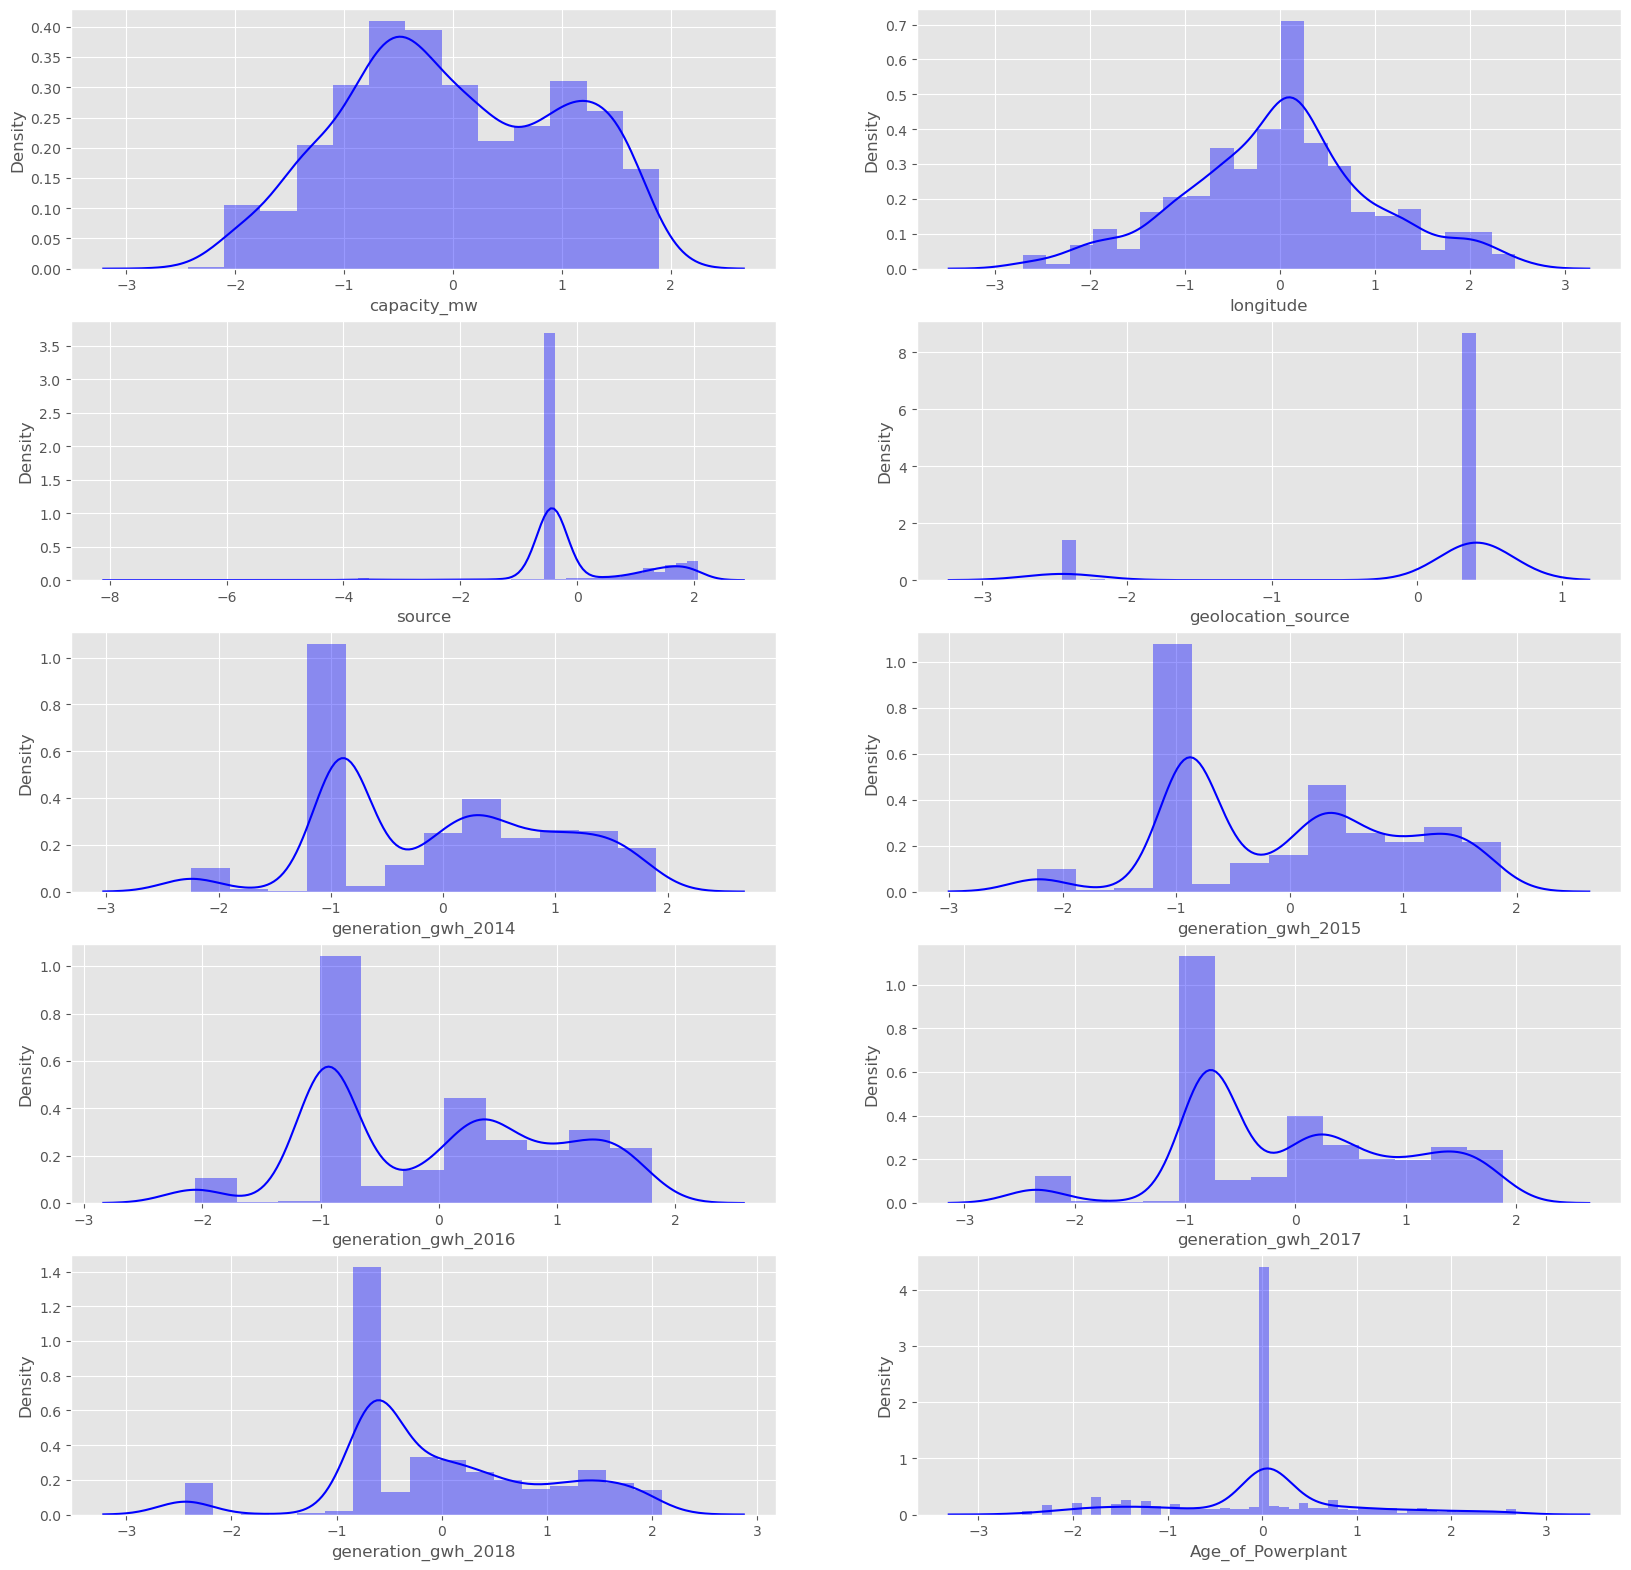

In [495]:
plt.figure(figsize=(20,60))
ptnum=1
for columns in feat:
    if ptnum<=10:
        ax=plt.subplot(15,2,ptnum)
        sns.distplot(new_df[columns],color='b')
        plt.xlabel(columns)
    ptnum+=1
plt.show()

In [496]:
cor= new_df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age_of_Powerplant
capacity_mw,1.000000,0.057972,0.342446,-0.529581,-0.041933,-0.334412,0.474987,0.757459,0.760339,0.792913,0.725192,0.658112,-0.251353
latitude,0.057972,1.000000,-0.069975,-0.000886,0.037224,0.060840,-0.207337,0.127853,0.121847,0.152363,0.140021,0.151176,-0.108286
longitude,0.342446,-0.069975,1.000000,-0.413280,0.027350,-0.198453,0.303271,0.267497,0.247803,0.297372,0.273371,0.260847,-0.141463
primary_fuel,-0.529581,-0.000886,-0.413280,1.000000,0.006307,0.006314,-0.481369,-0.376449,-0.371171,-0.398699,-0.356194,-0.336625,0.147928
other_fuel1,-0.041933,0.037224,0.027350,0.006307,1.000000,0.023496,-0.022904,-0.014115,0.007922,0.025657,0.000346,0.041814,-0.053759
source,-0.334412,0.060840,-0.198453,0.006314,0.023496,1.000000,-0.396947,-0.244797,-0.244136,-0.252735,-0.224322,-0.190145,-0.007056
geolocation_source,0.474987,-0.207337,0.303271,-0.481369,-0.022904,-0.396947,1.000000,0.301693,0.300898,0.313515,0.266767,0.223006,-0.002631
generation_gwh_2014,0.757459,0.127853,0.267497,-0.376449,-0.014115,-0.244797,0.301693,1.000000,0.848410,0.848035,0.776621,0.755111,-0.102748
generation_gwh_2015,0.760339,0.121847,0.247803,-0.371171,0.007922,-0.244136,0.300898,0.848410,1.000000,0.904655,0.793076,0.774797,-0.125518
generation_gwh_2016,0.792913,0.152363,0.297372,-0.398699,0.025657,-0.252735,0.313515,0.848035,0.904655,1.000000,0.884353,0.862621,-0.181588


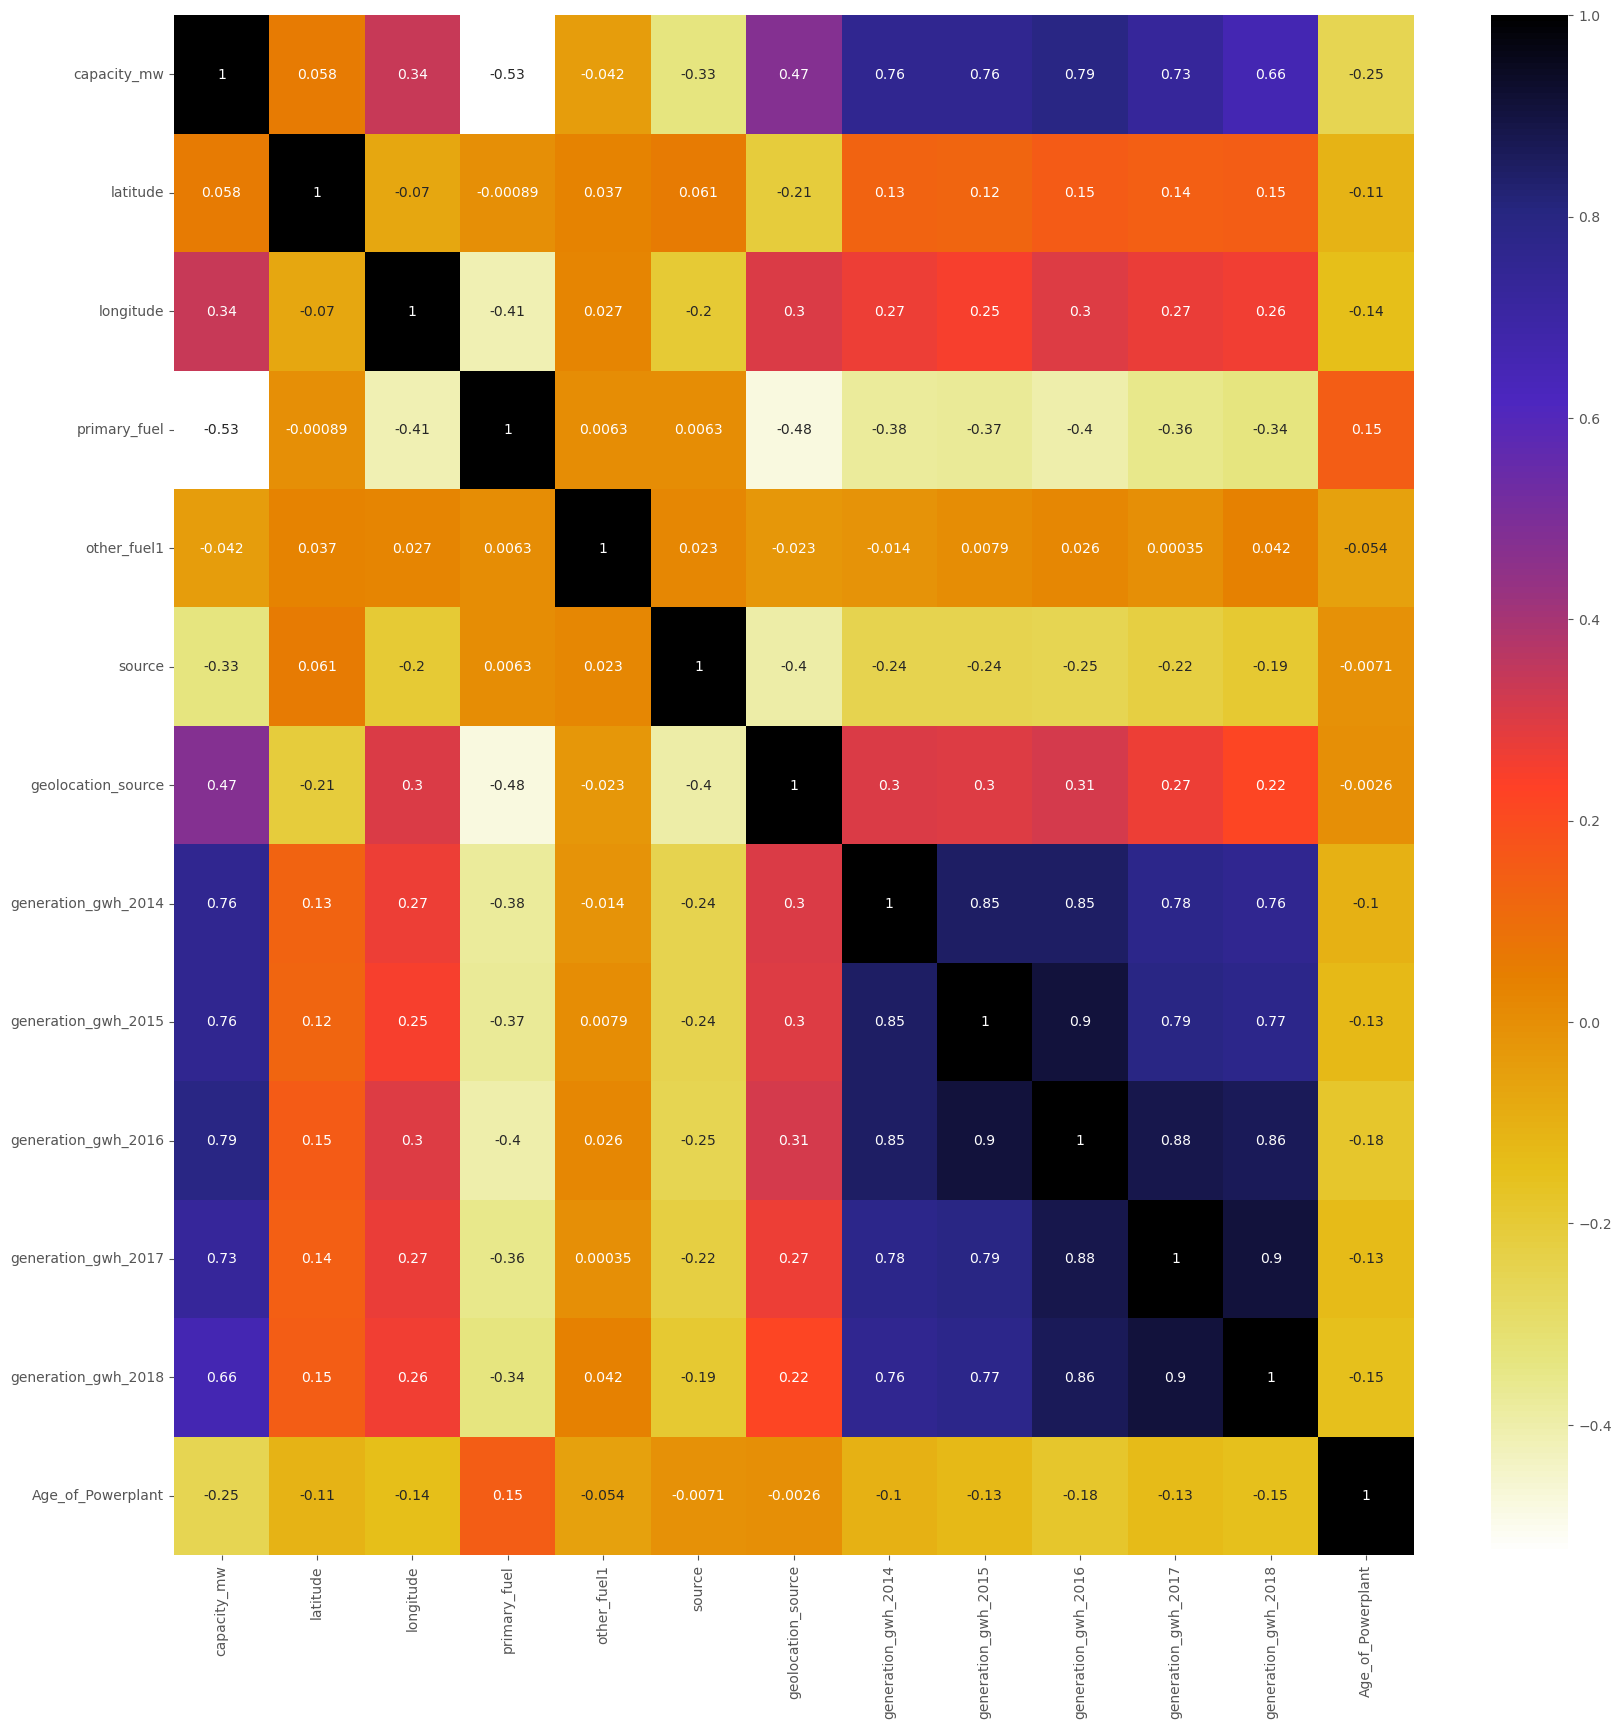

In [497]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(),annot=True,cmap='CMRmap_r')
plt.show()

In [498]:
classif_data=new_df
classif_data

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age_of_Powerplant
0,WRI1020239,-1.677481,28.1839,-0.923030,6,2,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,WRI1019881,0.217991,24.7663,-0.500876,1,2,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,WRI1026669,-0.276045,21.9038,-2.378126,7,2,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,IND0000001,0.389150,23.8712,2.432203,2,2,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,IND0000002,1.727387,21.9603,1.261806,1,2,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND0000513,1.668461,16.2949,0.231036,1,2,-0.419323,0.408766,1.476737,-1.863092,0.413698,0.864578,0.657367,-1.980203
903,WRI1026222,-1.598358,12.8932,0.420781,6,2,1.153075,-2.452783,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
904,WRI1026776,-0.508660,15.2758,-0.225422,7,2,-0.486073,0.408766,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
905,WRI1019901,0.109050,24.3500,-0.761662,1,2,0.863803,0.408766,0.232440,0.276415,0.382819,0.305697,0.168257,0.049506


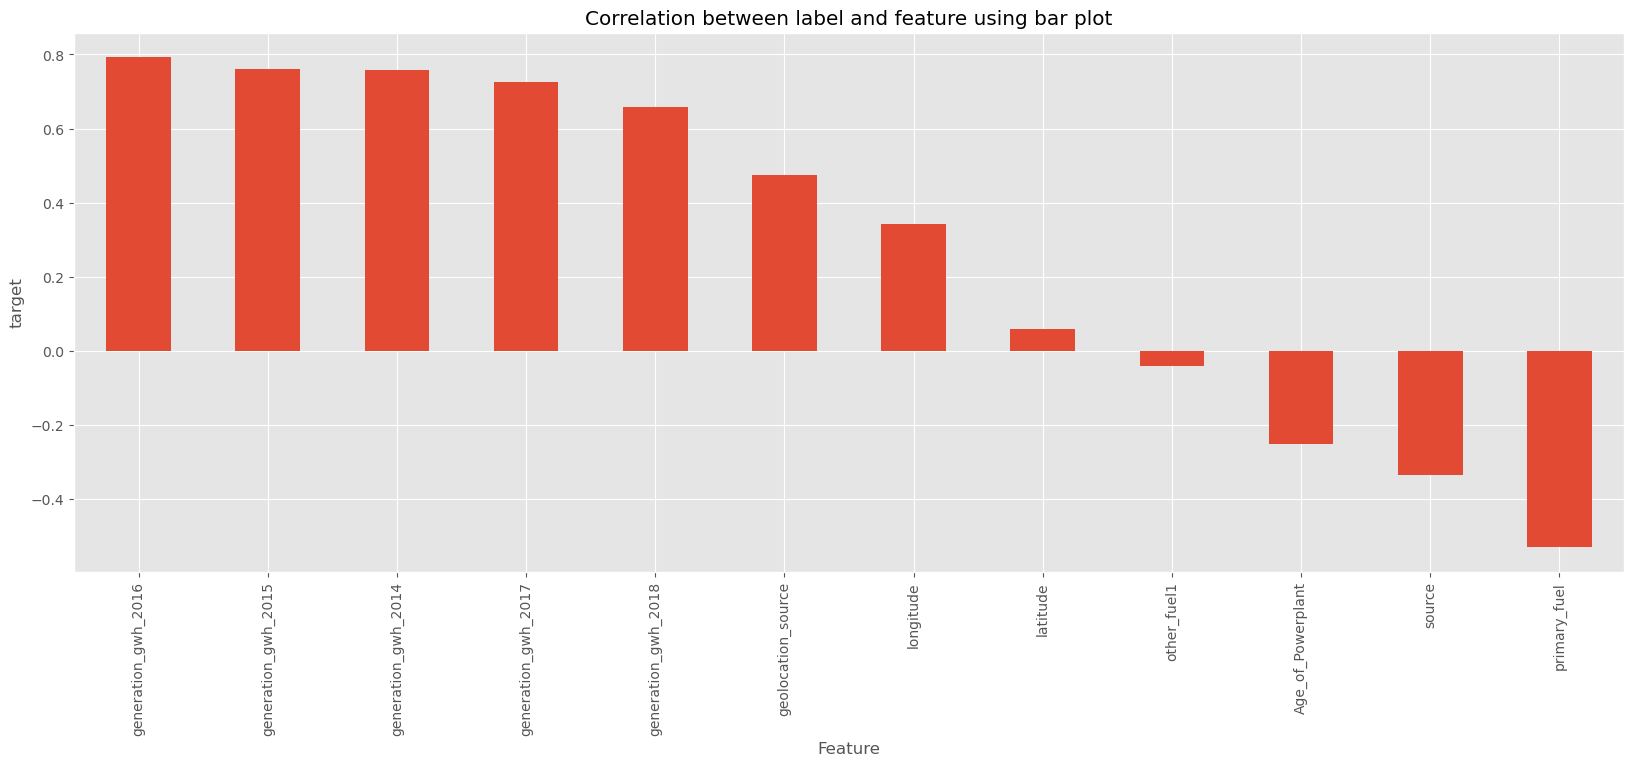

In [499]:
plt.figure(figsize=(20,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('target')
plt.title('Correlation between label and feature using bar plot')
plt.show()

In [500]:
new_df.drop('other_fuel1',axis=1, inplace=True)
new_df.drop('latitude',axis=1, inplace=True)
new_df.drop('gppd_idnr',axis=1, inplace=True)

In [501]:
x=new_df.drop('capacity_mw',axis=1)
y=new_df['capacity_mw']
x.head()

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age_of_Powerplant
0,-0.923030,6,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,-0.500876,1,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-2.378126,7,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,2.432203,2,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.261806,1,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572


In [502]:
x.shape

(852, 10)

In [503]:
y.shape

(852,)

In [504]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age_of_Powerplant
0,-0.923030,1.177615,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,-0.500876,-0.972680,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-2.378126,1.607673,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,2.432203,-0.542621,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.261806,-0.972680,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572
...,...,...,...,...,...,...,...,...,...,...
847,0.231036,-0.972680,-0.419323,0.408766,1.476737,-1.863092,0.413698,0.864578,0.657367,-1.980203
848,0.420781,1.177615,1.153075,-2.452783,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
849,-0.225422,1.607673,-0.486073,0.408766,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
850,-0.761662,-0.972680,0.863803,0.408766,0.232440,0.276415,0.382819,0.305697,0.168257,0.049506


In [505]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Features']=x.columns
vif

,VIF values,Features
0,1.297178,longitude
1,1.739390,primary_fuel
2,1.361687,source
3,1.662795,geolocation_source
4,4.224308,generation_gwh_2014
5,6.426827,generation_gwh_2015
6,10.785110,generation_gwh_2016
7,7.294450,generation_gwh_2017
8,6.220114,generation_gwh_2018
9,1.078297,Age_of_Powerplant


In [506]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


In [ ]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30, random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc > maxAccu:
        maxAccu=acc
        maxRS=i
print('Maximum r2 score is ',maxAccu ,'on Random_state ',maxRS)

In [508]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30, random_state=maxRS)

In [509]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


In [510]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR=RFR.predict(x_test)
print("R2_Score:",r2_score(y_test,predRFR))
print("MAE",mean_absolute_error(y_test,predRFR))
print("MSE",mean_squared_error(y_test,predRFR))
print("RMSE:",np.sqrt(mean_squared_error(y_test,predRFR)))
print(cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.9328452133497782
MAE 0.19543400954425375
MSE 0.07646549137238651
RMSE: 0.27652394357882737
0.8941538219385408


In [511]:
DTR=RandomForestRegressor()
DTR.fit(x_train,y_train)
predDTR=DTR.predict(x_test)
print("R2_Score:",r2_score(y_test,predDTR))
print("MAE",mean_absolute_error(y_test,predDTR))
print("MSE",mean_squared_error(y_test,predDTR))
print("RMSE:",np.sqrt(mean_squared_error(y_test,predDTR)))
print(cross_val_score(DTR,x,y,cv=5).mean())

R2_Score: 0.9320977447813811
MAE 0.19542312708590714
MSE 0.07731659304687466
RMSE: 0.2780586144086794
0.8902576150778965


In [512]:
knn=KNN()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("R2_Score:",r2_score(y_test,predknn))
print("MAE",mean_absolute_error(y_test,predknn))
print("MSE",mean_squared_error(y_test,predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test,predknn)))
print(cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.9006511015364789
MAE 0.25059709359517646
MSE 0.11312316987747278
RMSE: 0.33633788052711633
0.8616248582667231


In [513]:
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print("R2_Score:",r2_score(y_test,predGB))
print("MAE",mean_absolute_error(y_test,predGB))
print("MSE",mean_squared_error(y_test,predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test,predGB)))
print(cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.9277108211456668
MAE 0.21529110353948472
MSE 0.08231174362586793
RMSE: 0.28690023287872723
0.9008983884658319


In [514]:
BR=BaggingRegressor()
BR.fit(x_train,y_train)
predBR=BR.predict(x_test)
print("R2_Score:",r2_score(y_test,predBR))
print("MAE",mean_absolute_error(y_test,predBR))
print("MSE",mean_squared_error(y_test,predBR))
print("RMSE:",np.sqrt(mean_squared_error(y_test,predBR)))
print(cross_val_score(BR,x,y,cv=5).mean())

R2_Score: 0.9288105316257949
MAE 0.19768767490637393
MSE 0.0810595633059701
RMSE: 0.28470961224723357
0.8830537144483618


In [515]:
from sklearn.model_selection import GridSearchCV

In [516]:
parameters={'loss':['squared_error','absolute_error','huber','quantile'],
           'max_features':['auto','sqrt','log2'],
           'learning_rate':[0.1,.2,.4,.5],
           'criterion':['friedman_mse','squared_error','mse']
           }
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [517]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.2, 0.4, 0.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [518]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_features': 'log2'}

In [519]:
capacity_model=GradientBoostingRegressor(criterion='squared_error',learning_rate=0.1,loss='squared_error',max_features='sqrt')
capacity_model.fit(x_train,y_train)
pred=capacity_model.predict(x_test)
print("R2_Score:",r2_score(y_test,pred)*100)
print("RMSE:",np.sqrt(mean_squared_error(y_test,predRFR)*100))

R2_Score: 92.9161296656713
RMSE: 2.7652394357882737


In [520]:
import joblib
joblib.dump(capacity_model,'GobalPower_plant_capacity.pk1')

['GobalPower_plant_capacity.pk1']

In [521]:
model=joblib.load('GobalPower_plant_capacity.pk1')
prediction=model.predict(x_test)
a=np.array(y_test)
df_final=pd.DataFrame({'Original':a,'predicted':prediction},index=range(len(a)))
df_final


,Original,predicted
0,-0.396120,-0.274636
1,-0.458110,-0.432981
2,-0.948842,-1.028144
3,0.165116,0.156962
4,1.523747,1.332695
...,...,...
251,0.860692,1.072755
252,1.698815,1.313328
253,1.377918,0.965444
254,1.593827,1.378436


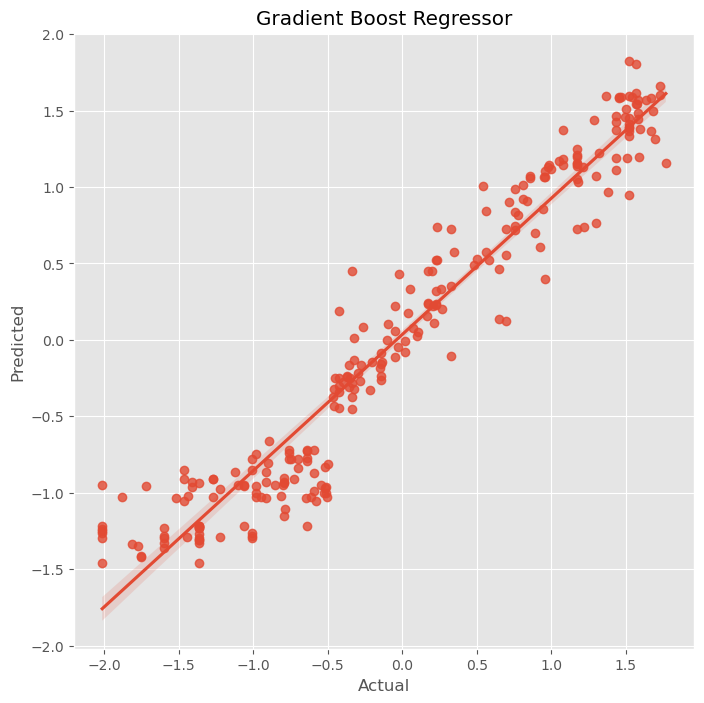

In [522]:
plt.figure(figsize=(8,8))
sns.regplot(x=y_test,y=prediction,data=df)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boost Regressor')
plt.show()

In [523]:
classif_data=new_df
classif_data.head()


,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age_of_Powerplant
0,-1.677481,-0.923030,6,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,-0.500876,1,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,-2.378126,7,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,2.432203,2,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,1.261806,1,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572


In [524]:
classif_data.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

In [525]:

classif_data.corr()

,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age_of_Powerplant
capacity_mw,1.000000,0.342446,-0.529581,-0.334412,0.474987,0.757459,0.760339,0.792913,0.725192,0.658112,-0.251353
longitude,0.342446,1.000000,-0.413280,-0.198453,0.303271,0.267497,0.247803,0.297372,0.273371,0.260847,-0.141463
Fuel_Type,-0.529581,-0.413280,1.000000,0.006314,-0.481369,-0.376449,-0.371171,-0.398699,-0.356194,-0.336625,0.147928
source,-0.334412,-0.198453,0.006314,1.000000,-0.396947,-0.244797,-0.244136,-0.252735,-0.224322,-0.190145,-0.007056
geolocation_source,0.474987,0.303271,-0.481369,-0.396947,1.000000,0.301693,0.300898,0.313515,0.266767,0.223006,-0.002631
generation_gwh_2014,0.757459,0.267497,-0.376449,-0.244797,0.301693,1.000000,0.848410,0.848035,0.776621,0.755111,-0.102748
generation_gwh_2015,0.760339,0.247803,-0.371171,-0.244136,0.300898,0.848410,1.000000,0.904655,0.793076,0.774797,-0.125518
generation_gwh_2016,0.792913,0.297372,-0.398699,-0.252735,0.313515,0.848035,0.904655,1.000000,0.884353,0.862621,-0.181588
generation_gwh_2017,0.725192,0.273371,-0.356194,-0.224322,0.266767,0.776621,0.793076,0.884353,1.000000,0.904954,-0.131981
generation_gwh_2018,0.658112,0.260847,-0.336625,-0.190145,0.223006,0.755111,0.774797,0.862621,0.904954,1.000000,-0.147871


In [526]:
classif_data.drop('longitude',axis=1,inplace=True)
classif_data.drop('source',axis=1,inplace=True)


<Axes: >

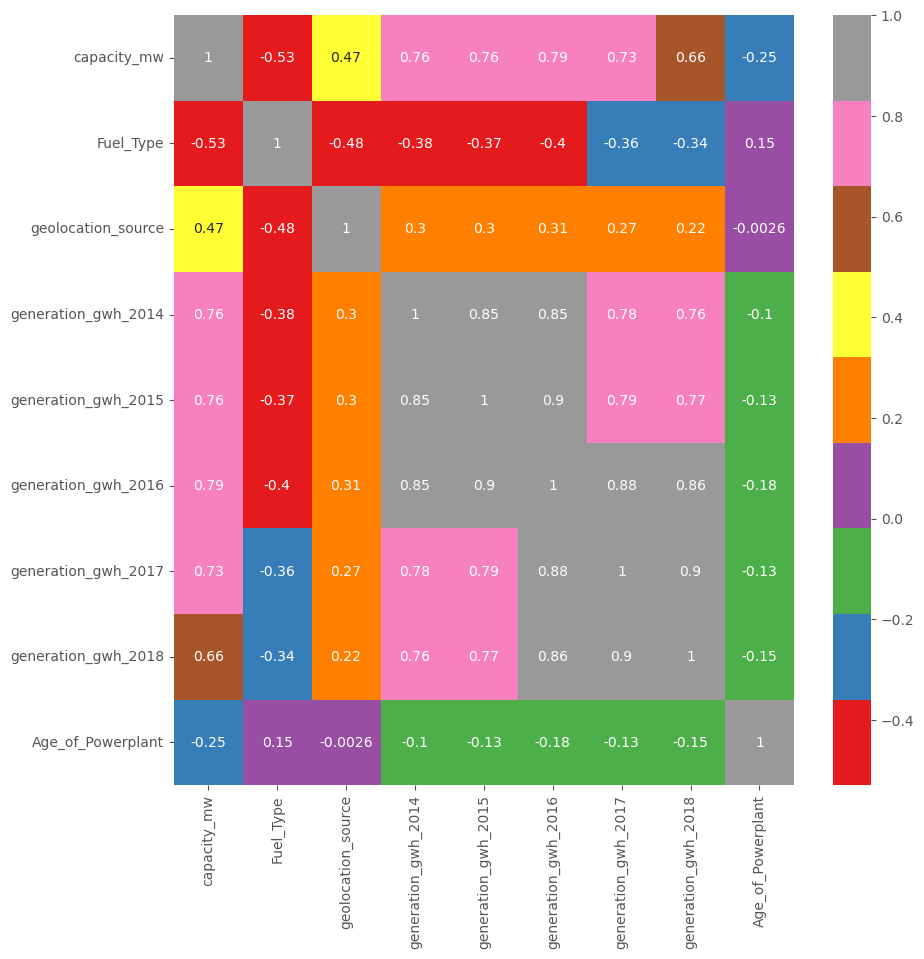

In [527]:
plt.figure(figsize=(10,10))
sns.heatmap(classif_data.corr(),annot=True,cmap='Set1')

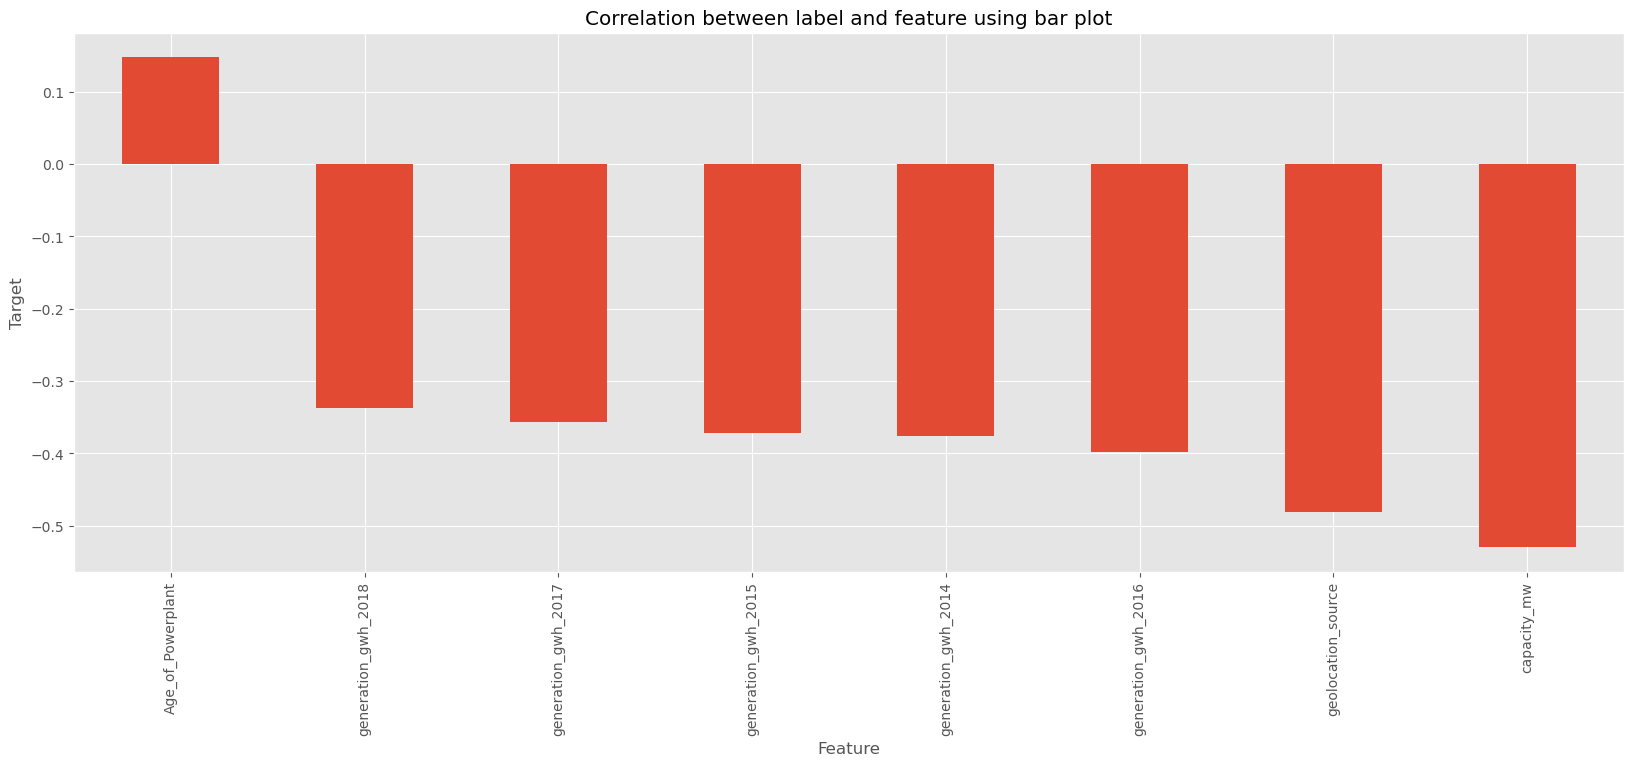

In [528]:
plt.figure(figsize=(20,7))
classif_data.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Correlation between label and feature using bar plot')
plt.show()

In [529]:

classif_data.head()

,capacity_mw,Fuel_Type,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age_of_Powerplant
0,-1.677481,6,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,1,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,7,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,2,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,1,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572


In [530]:
cl_x = classif_data.drop('Fuel_Type', axis=1)


cl_y=classif_data['Fuel_Type']
#cl_x = classif_data.drop('Fuel_Type', axis=1, inplace=True)


In [531]:
cl_x.shape

(852, 8)

In [532]:
cl_y.shape

(852,)

In [533]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
cl_x=pd.DataFrame(scalar.fit_transform(cl_x),columns=cl_x.columns)
cl_x

,capacity_mw,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Age_of_Powerplant
0,-1.677481,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.089330
1,0.217991,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.049506
2,-0.276045,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.049506
3,0.389150,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.244998
4,1.727387,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.764572
...,...,...,...,...,...,...,...,...
847,1.668461,0.408766,1.476737,-1.863092,0.413698,0.864578,0.657367,-1.980203
848,-1.598358,-2.452783,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
849,-0.508660,0.408766,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.049506
850,0.109050,0.408766,0.232440,0.276415,0.382819,0.305697,0.168257,0.049506


In [534]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(cl_x.values,i) for i in range (len(cl_x.columns))]
vif['Features']=cl_x.columns
vif

,VIF values,Features
0,3.814449,capacity_mw
1,1.350136,geolocation_source
2,4.444195,generation_gwh_2014
3,6.465385,generation_gwh_2015
4,11.077630,generation_gwh_2016
5,7.530329,generation_gwh_2017
6,6.381029,generation_gwh_2018
7,1.139573,Age_of_Powerplant


In [535]:
cl_y.value_counts()


1    240
3    220
6    126
7    123
2     65
0     50
5     20
4      8
Name: Fuel_Type, dtype: int64

In [537]:
!pip install imblearn

In [538]:


from imblearn.over_sampling import SMOTE
SM=SMOTE()
cl_x,cl_y=SM.fit_resample(cl_x,cl_y)
cl_y.value_counts()

6    240
1    240
7    240
2    240
3    240
0    240
5    240
4    240
Name: Fuel_Type, dtype: int64

In [539]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [540]:
maxAccu=0
maxRS=0
for i in range(1,200):
    cl_x_train,cl_x_test,cl_y_train,cl_y_test= train_test_split(cl_x,cl_y,test_size=.30, random_state=i)
    DTC=DecisionTreeClassifier()
    DTC.fit(cl_x_train,cl_y_train)
    pred=DTC.predict(cl_x_test)
    acc=accuracy_score(cl_y_test,pred)
    if acc > maxAccu:
        maxAccu=acc
        maxRS=i
print('Maximum r2 score is ',maxAccu ,'on Random_state ',maxRS)

Maximum r2 score is  0.7951388888888888 on Random_state  107


In [541]:
cl_x_train,cl_x_test,cl_y_train,cl_y_test= train_test_split(cl_x,cl_y,test_size=.30, random_state=maxRS)

In [542]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [543]:
DTC=DecisionTreeClassifier()
DTC.fit(cl_x_train,cl_y_train)
predDTC=DTC.predict(cl_x_test)
print(accuracy_score(cl_y_test,predDTC))
print(confusion_matrix(cl_y_test,predDTC))
print(classification_report(cl_y_test,predDTC))

print(cross_val_score(DTC,cl_x,cl_y,cv=5).mean())

0.7829861111111112
[[53  6  0  0  0  5  0 10]
 [ 4 30  8  4 16  1  0  0]
 [ 3  3 52 15  1  0  0  3]
 [ 0  7  5 54  1  0  0  1]
 [ 0  3  2  2 63  0  0  0]
 [ 1  0  2  2  0 68  0  0]
 [ 0  1  0  1  0  0 82  0]
 [ 6  7  2  0  0  3  0 49]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        74
           1       0.53      0.48      0.50        63
           2       0.73      0.68      0.70        77
           3       0.69      0.79      0.74        68
           4       0.78      0.90      0.83        70
           5       0.88      0.93      0.91        73
           6       1.00      0.98      0.99        84
           7       0.78      0.73      0.75        67

    accuracy                           0.78       576
   macro avg       0.77      0.78      0.77       576
weighted avg       0.78      0.78      0.78       576

0.7552083333333333


In [544]:
RFC=RandomForestClassifier()
RFC.fit(cl_x_train,cl_y_train)
predRFC=RFC.predict(cl_x_test)
print(accuracy_score(cl_y_test,predRFC))
print(confusion_matrix(cl_y_test,predRFC))
print(classification_report(cl_y_test,predRFC))


print(cross_val_score(RFC,cl_x,cl_y,cv=5).mean())

0.8402777777777778
[[55  6  0  0  0  4  0  9]
 [ 4 40  7  1  9  1  0  1]
 [ 2  7 60  2  0  3  0  3]
 [ 0  5  4 57  1  0  0  1]
 [ 0  0  1  0 69  0  0  0]
 [ 2  0  0  0  0 69  0  2]
 [ 0  0  0  1  0  0 83  0]
 [ 6  4  2  0  0  4  0 51]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        74
           1       0.65      0.63      0.64        63
           2       0.81      0.78      0.79        77
           3       0.93      0.84      0.88        68
           4       0.87      0.99      0.93        70
           5       0.85      0.95      0.90        73
           6       1.00      0.99      0.99        84
           7       0.76      0.76      0.76        67

    accuracy                           0.84       576
   macro avg       0.83      0.83      0.83       576
weighted avg       0.84      0.84      0.84       576

0.8


In [545]:
SVM=SVC()
SVM.fit(cl_x_train,cl_y_train)
pred=SVM.predict(cl_x_test)

print(accuracy_score(cl_y_test,pred))
print(confusion_matrix(cl_y_test,pred))
print(classification_report(cl_y_test,pred))

print(cross_val_score(SVM,cl_x,cl_y,cv=5).mean())

0.7013888888888888
[[70  0  0  0  0  0  0  4]
 [ 6 23  7  0 20  0  0  7]
 [ 6  8 50  0  5  3  0  5]
 [ 4  8  6 40  2  0  0  8]
 [ 0  5  0  1 64  0  0  0]
 [22  0  0  0  0 39  0 12]
 [ 0  3  0  0  0  0 81  0]
 [27  0  3  0  0  0  0 37]]
              precision    recall  f1-score   support

           0       0.52      0.95      0.67        74
           1       0.49      0.37      0.42        63
           2       0.76      0.65      0.70        77
           3       0.98      0.59      0.73        68
           4       0.70      0.91      0.80        70
           5       0.93      0.53      0.68        73
           6       1.00      0.96      0.98        84
           7       0.51      0.55      0.53        67

    accuracy                           0.70       576
   macro avg       0.73      0.69      0.69       576
weighted avg       0.74      0.70      0.70       576

0.6723958333333332


In [546]:
knn=KNN()
knn.fit(cl_x_train,cl_y_train)
predknn=knn.predict(cl_x_test)

print(accuracy_score(cl_y_test,predknn))
print(confusion_matrix(cl_y_test,predknn))
print(classification_report(cl_y_test,predknn))

print(cross_val_score(knn,cl_x,cl_y,cv=5).mean())

0.796875
[[63  3  0  0  0  3  0  5]
 [ 5 35  4  1 13  2  0  3]
 [ 4  7 53  2  2  5  0  4]
 [ 0  8  3 48  1  2  1  5]
 [ 0  1  1  0 68  0  0  0]
 [ 2  2  3  0  0 66  0  0]
 [ 0  1  0  1  0  0 82  0]
 [14  2  1  0  0  6  0 44]]
              precision    recall  f1-score   support

           0       0.72      0.85      0.78        74
           1       0.59      0.56      0.57        63
           2       0.82      0.69      0.75        77
           3       0.92      0.71      0.80        68
           4       0.81      0.97      0.88        70
           5       0.79      0.90      0.84        73
           6       0.99      0.98      0.98        84
           7       0.72      0.66      0.69        67

    accuracy                           0.80       576
   macro avg       0.79      0.79      0.79       576
weighted avg       0.80      0.80      0.79       576

0.7682291666666667


In [547]:
BC=BaggingClassifier()
BC.fit(cl_x_train,cl_y_train)
predBC=BC.predict(cl_x_test)
print(accuracy_score(cl_y_test,predBC))
print(confusion_matrix(cl_y_test,predBC))
print(classification_report(cl_y_test,predBC))

print(cross_val_score(BC,cl_x,cl_y,cv=5).mean())

0.8333333333333334
[[56  6  0  0  0  3  0  9]
 [ 4 38  6  2 11  1  0  1]
 [ 3  4 62  4  0  1  0  3]
 [ 0  9  2 54  1  0  1  1]
 [ 0  0  1  1 68  0  0  0]
 [ 3  0  0  1  0 68  0  1]
 [ 0  0  1  1  0  0 82  0]
 [ 6  6  1  0  0  2  0 52]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        74
           1       0.60      0.60      0.60        63
           2       0.85      0.81      0.83        77
           3       0.86      0.79      0.82        68
           4       0.85      0.97      0.91        70
           5       0.91      0.93      0.92        73
           6       0.99      0.98      0.98        84
           7       0.78      0.78      0.78        67

    accuracy                           0.83       576
   macro avg       0.83      0.83      0.83       576
weighted avg       0.83      0.83      0.83       576

0.7854166666666667


In [548]:
GBC=GradientBoostingClassifier()
GBC.fit(cl_x_train,cl_y_train)
predGBC=GBC.predict(cl_x_test)
print(accuracy_score(cl_y_test,predGBC)*100)
print(confusion_matrix(cl_y_test,predGBC))
print(classification_report(cl_y_test,predGBC))
print("Cross validation score",cross_val_score(GBC,cl_x,cl_y,cv=5).mean()*100)

81.07638888888889
[[59  3  0  0  0  4  0  8]
 [ 5 34  5  4 10  2  0  3]
 [ 3  6 53  6  2  4  0  3]
 [ 2  8  4 53  1  0  0  0]
 [ 0  1  1  1 67  0  0  0]
 [ 3  1  0  1  0 66  0  2]
 [ 0  0  0  2  0  0 82  0]
 [ 9  3  1  0  0  1  0 53]]
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        74
           1       0.61      0.54      0.57        63
           2       0.83      0.69      0.75        77
           3       0.79      0.78      0.79        68
           4       0.84      0.96      0.89        70
           5       0.86      0.90      0.88        73
           6       1.00      0.98      0.99        84
           7       0.77      0.79      0.78        67

    accuracy                           0.81       576
   macro avg       0.80      0.80      0.80       576
weighted avg       0.81      0.81      0.81       576

Cross validation score 79.16666666666667


In [549]:
parameters={'loss' :['log_loss','deviance','exponential'],
            'n_estimators':[1,20,50,100],
           'learning_rate':[0.1,.2,.4,.5],
           'criterion':['friedman_mse','squared_error','mse']
           }
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [550]:
GCV.fit(cl_x_train,cl_y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.2, 0.4, 0.5],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'n_estimators': [1, 20, 50, 100]})

In [551]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.5,
 'loss': 'log_loss',
 'n_estimators': 100}

In [554]:
Fuel_model=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=0.5,loss='log_loss',n_estimators=100)


In [556]:
Fuel_model.fit(cl_x_train,cl_y_train)
pred=Fuel_model.predict(cl_x_test)
acc=accuracy_score(cl_y_test,pred)
print("Accuracy Score",acc*100)

Accuracy Score 81.42361111111111


In [561]:
import joblib
joblib.dump(Fuel_model,'GlobalPower_plant_Fuel_Type.pk1')

['GlobalPower_plant_Fuel_Type.pk1']

In [562]:
model=joblib.load("GlobalPower_plant_Fuel_type.pk1")
prediction=model.predict(cl_x_test)
prediction

array([1, 3, 1, 2, 3, 3, 7, 7, 2, 2, 6, 2, 5, 7, 2, 4, 1, 6, 2, 3, 3, 3,
       6, 0, 0, 5, 7, 2, 0, 0, 0, 0, 3, 5, 1, 4, 5, 2, 3, 1, 4, 6, 0, 6,
       7, 6, 0, 6, 7, 4, 7, 0, 4, 1, 5, 4, 1, 5, 5, 2, 7, 7, 3, 1, 0, 3,
       6, 5, 6, 2, 5, 3, 7, 5, 4, 3, 2, 2, 2, 7, 6, 6, 6, 0, 1, 2, 6, 7,
       7, 4, 1, 6, 2, 4, 0, 6, 6, 4, 4, 2, 5, 7, 2, 2, 5, 4, 5, 4, 0, 7,
       1, 1, 7, 6, 6, 1, 2, 6, 3, 6, 6, 7, 0, 5, 0, 7, 1, 3, 1, 5, 1, 7,
       0, 5, 4, 3, 3, 0, 5, 1, 5, 3, 5, 6, 0, 5, 0, 4, 5, 6, 3, 4, 2, 7,
       4, 1, 5, 5, 0, 4, 6, 6, 5, 5, 5, 5, 2, 0, 7, 3, 0, 0, 5, 2, 3, 7,
       7, 2, 3, 1, 1, 0, 6, 0, 0, 6, 5, 5, 5, 6, 4, 3, 6, 3, 5, 4, 5, 6,
       5, 4, 0, 6, 7, 1, 3, 3, 3, 7, 6, 1, 1, 4, 0, 0, 0, 2, 7, 6, 2, 2,
       1, 7, 6, 2, 1, 4, 3, 1, 1, 0, 1, 0, 5, 7, 7, 4, 3, 5, 5, 0, 4, 0,
       2, 5, 3, 6, 3, 1, 7, 7, 7, 2, 6, 0, 4, 2, 4, 2, 7, 5, 6, 2, 3, 1,
       6, 1, 7, 3, 5, 6, 2, 6, 3, 2, 5, 3, 0, 5, 1, 6, 2, 6, 6, 0, 0, 3,
       4, 1, 4, 0, 1, 6, 3, 2, 1, 5, 7, 7, 3, 5, 5,

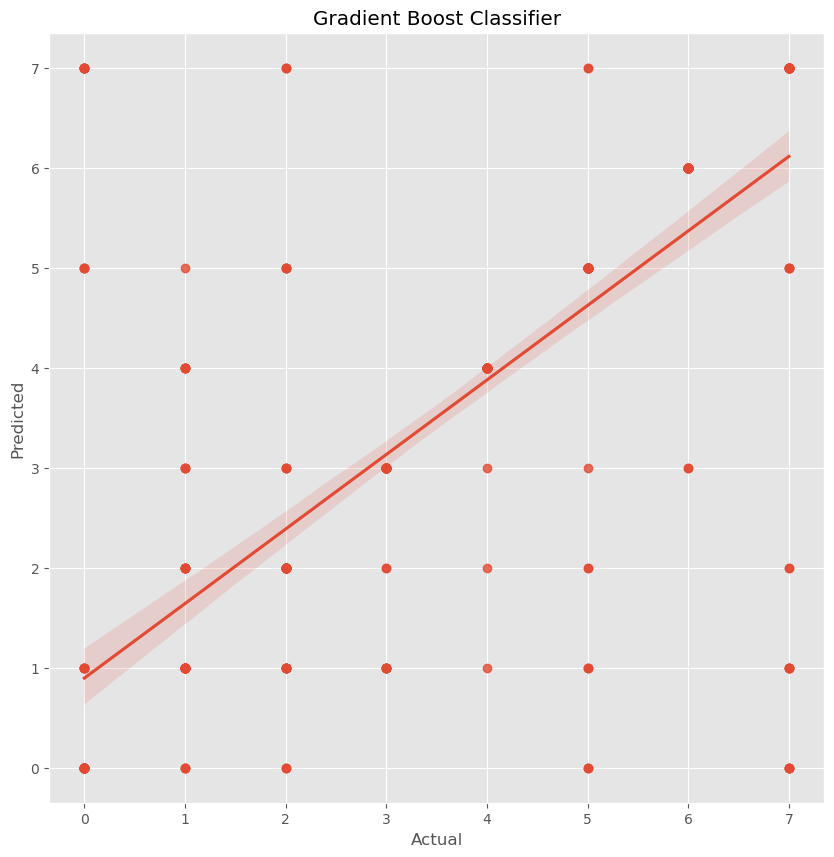

In [566]:
plt.figure(figsize=(10,10))
sns.regplot(x=cl_y_test,y=prediction)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Gradient Boost Classifier")
plt.show()

In [564]:
## Regression model achive the accuracy of 92.64%
##classification model achive the accuracy of 81.77%